Step-1: Read the data
Step-2: Data quick checks
        a) dtypes columns shape size  info
Step-3: Convert categorical columns
        Numerical columns names separately
Step-4: You need fill the missing values
Step-5: Categorical data analysis
        Unique
        nunique
        value counts
        bar chart
        count plot
        pie chart
Step-6: Numerical data analysis
        Describe function
        Histogram
        Data skew ness
Step-7: Box plot creation
        Outlier analysis

Step-8: Transformation methods

Step-9: Encoding methods
        map
        np.where
        LabelEncoder
        onehot encoder
Step-10: Scaling methods
         Z
         minmax scalar


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\JOHN\Downloads\bank-additional.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Basic EDA perform on data

In [3]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.select_dtypes(include='number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [5]:
df.select_dtypes(exclude='object').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [6]:
df.shape

(4119, 21)

In [7]:
df.size

86499

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

***dtypes: float64(5), int64(5), object(11)***

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

***In bank data there are 4119 rows and 21 column***

# Checking missing values in data

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

***No missing values are there***

# Convert Categorical columns

In [11]:
cols = df.select_dtypes(include='object').columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [12]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [13]:
for i in cols:
    print(i,df[i].unique())

job ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['yes' 'no' 'unknown']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [14]:
for i in cols:
    print(i,df[i].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [15]:
for i in cols:
    print(i,df[i].value_counts())

job job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64
marital marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64
education education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64
default default
no         3315
unknown     803
yes           1
Name: count, dtype: int64
housing housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64
loan loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64
contact contact
cellular     2652
telephone    1467
Name: 

***In this data count of unique values of every column***

# Visualization:

In [16]:
df["marital"].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

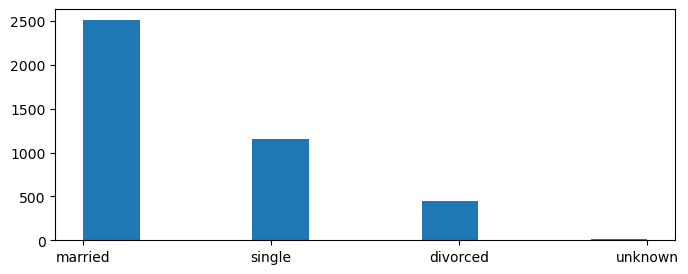

In [17]:
plt.figure(figsize=(8,3))
plt.hist(df["marital"])
plt.show()

In [18]:
marital = df["marital"]
counts = df["marital"].value_counts()
job_df = pd.DataFrame(marital,counts)
job_df

,marital
count,
2509,divorced
1153,single
446,married
11,single


In [19]:
job_df = pd.DataFrame(df["job"])
category_counts = df["job"].value_counts()
print(category_counts.index,category_counts)


Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job') job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


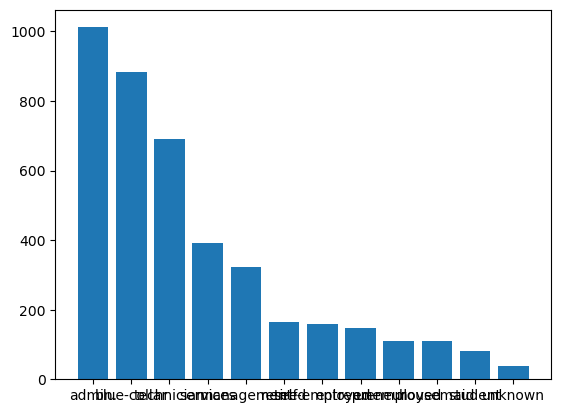

In [20]:
plt.bar(category_counts.index,category_counts.values)
plt.show()

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job') job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64
Index(['married', 'single', 'divorced', 'unknown'], dtype='object', name='marital') marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64
Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object', name='education') education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y 

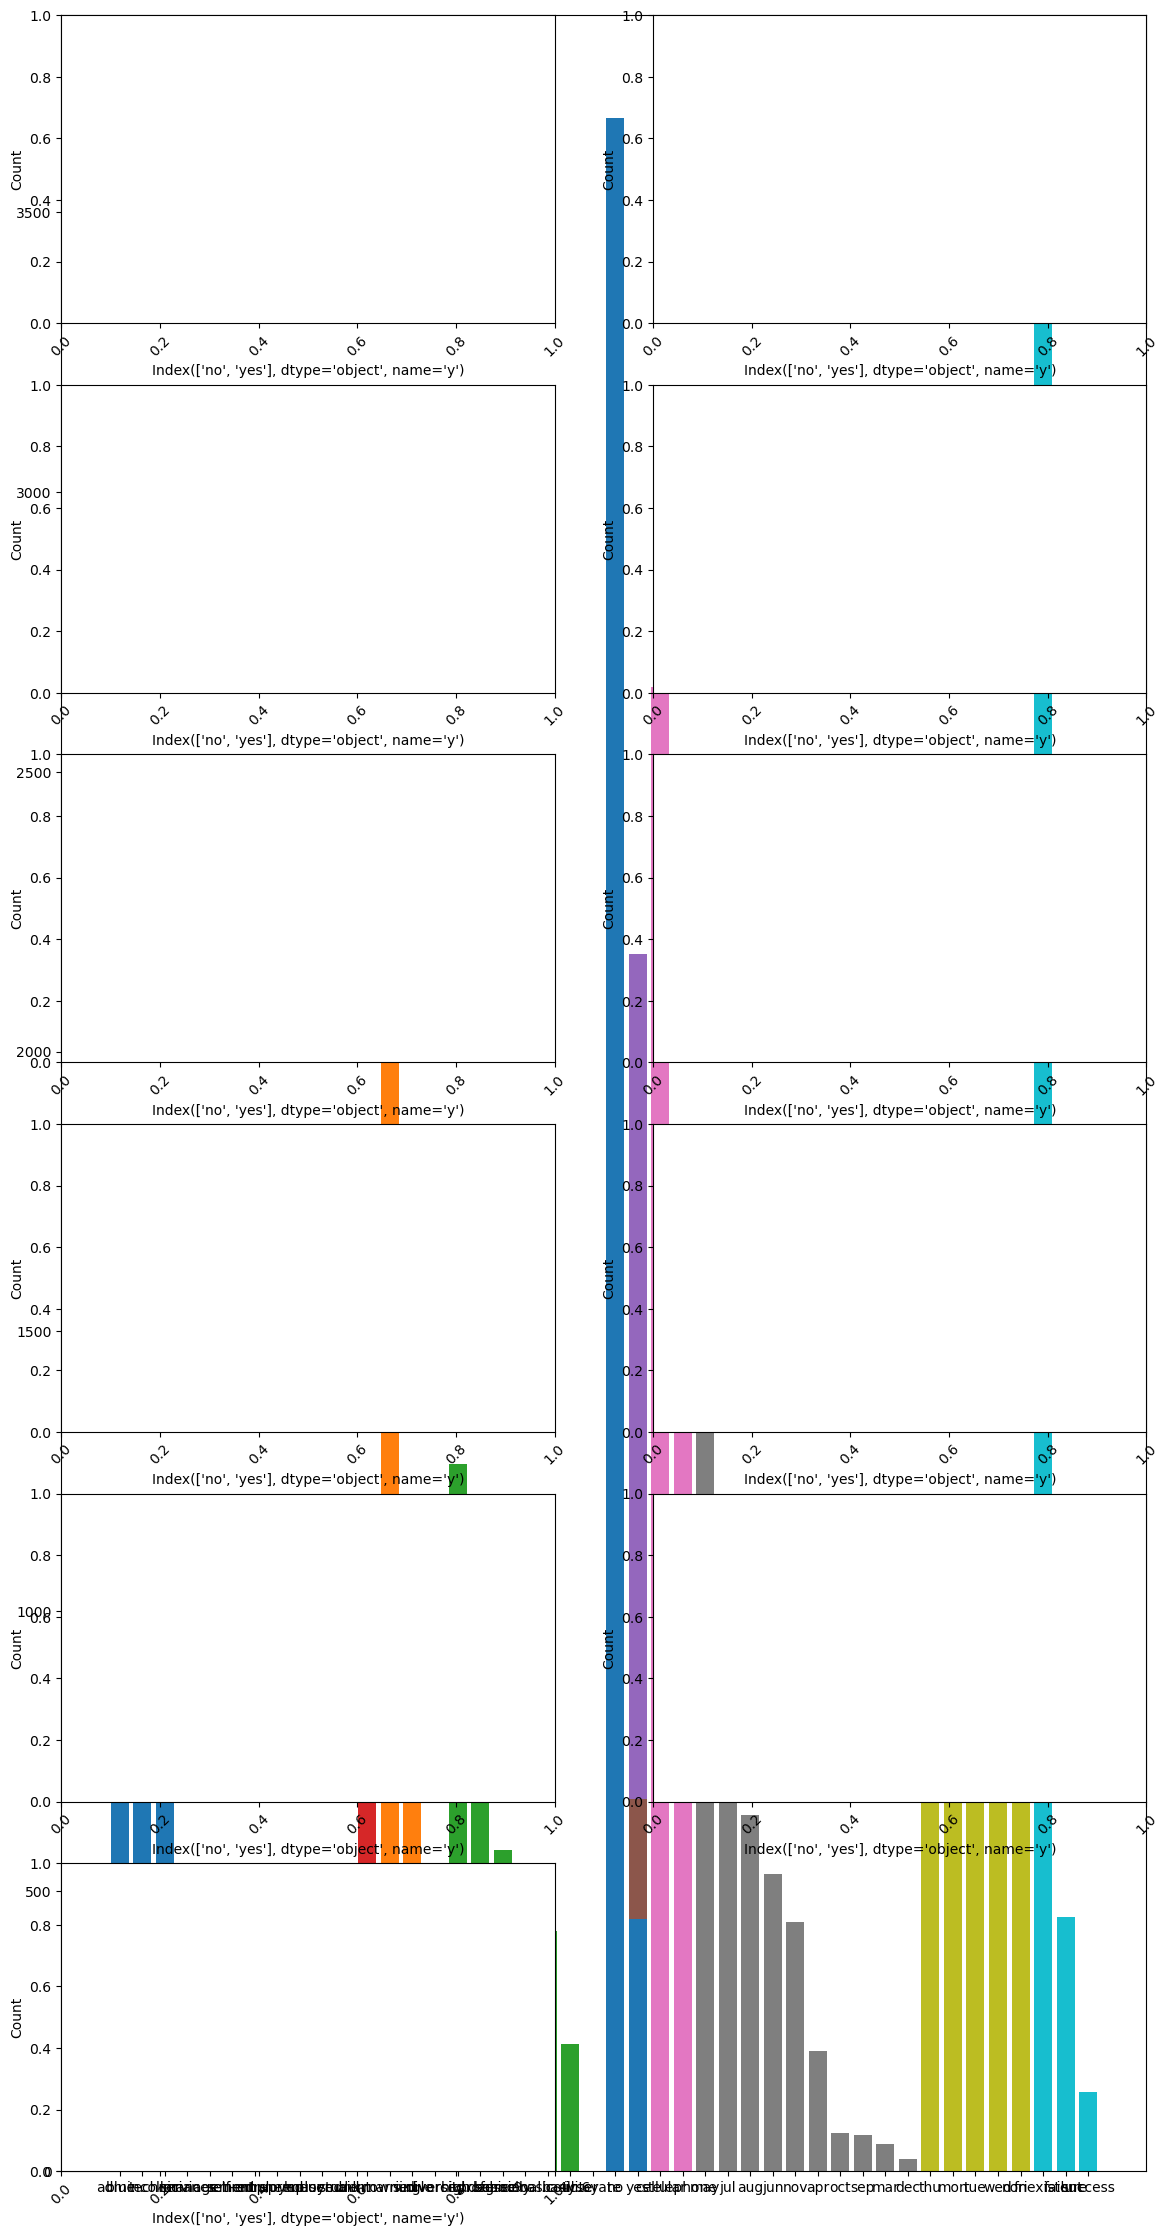

In [21]:
job_df = pd.DataFrame(df["job"])
plt.figure(figsize = (14, 28))

for i in cols:
    category_counts = df[i].value_counts()
    plt.bar(category_counts.index,category_counts)
    print(category_counts.index,category_counts)
    
for j in range(1,12):
    plt.subplot(6,2,j)
    plt.xlabel(category_counts.index)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.show()

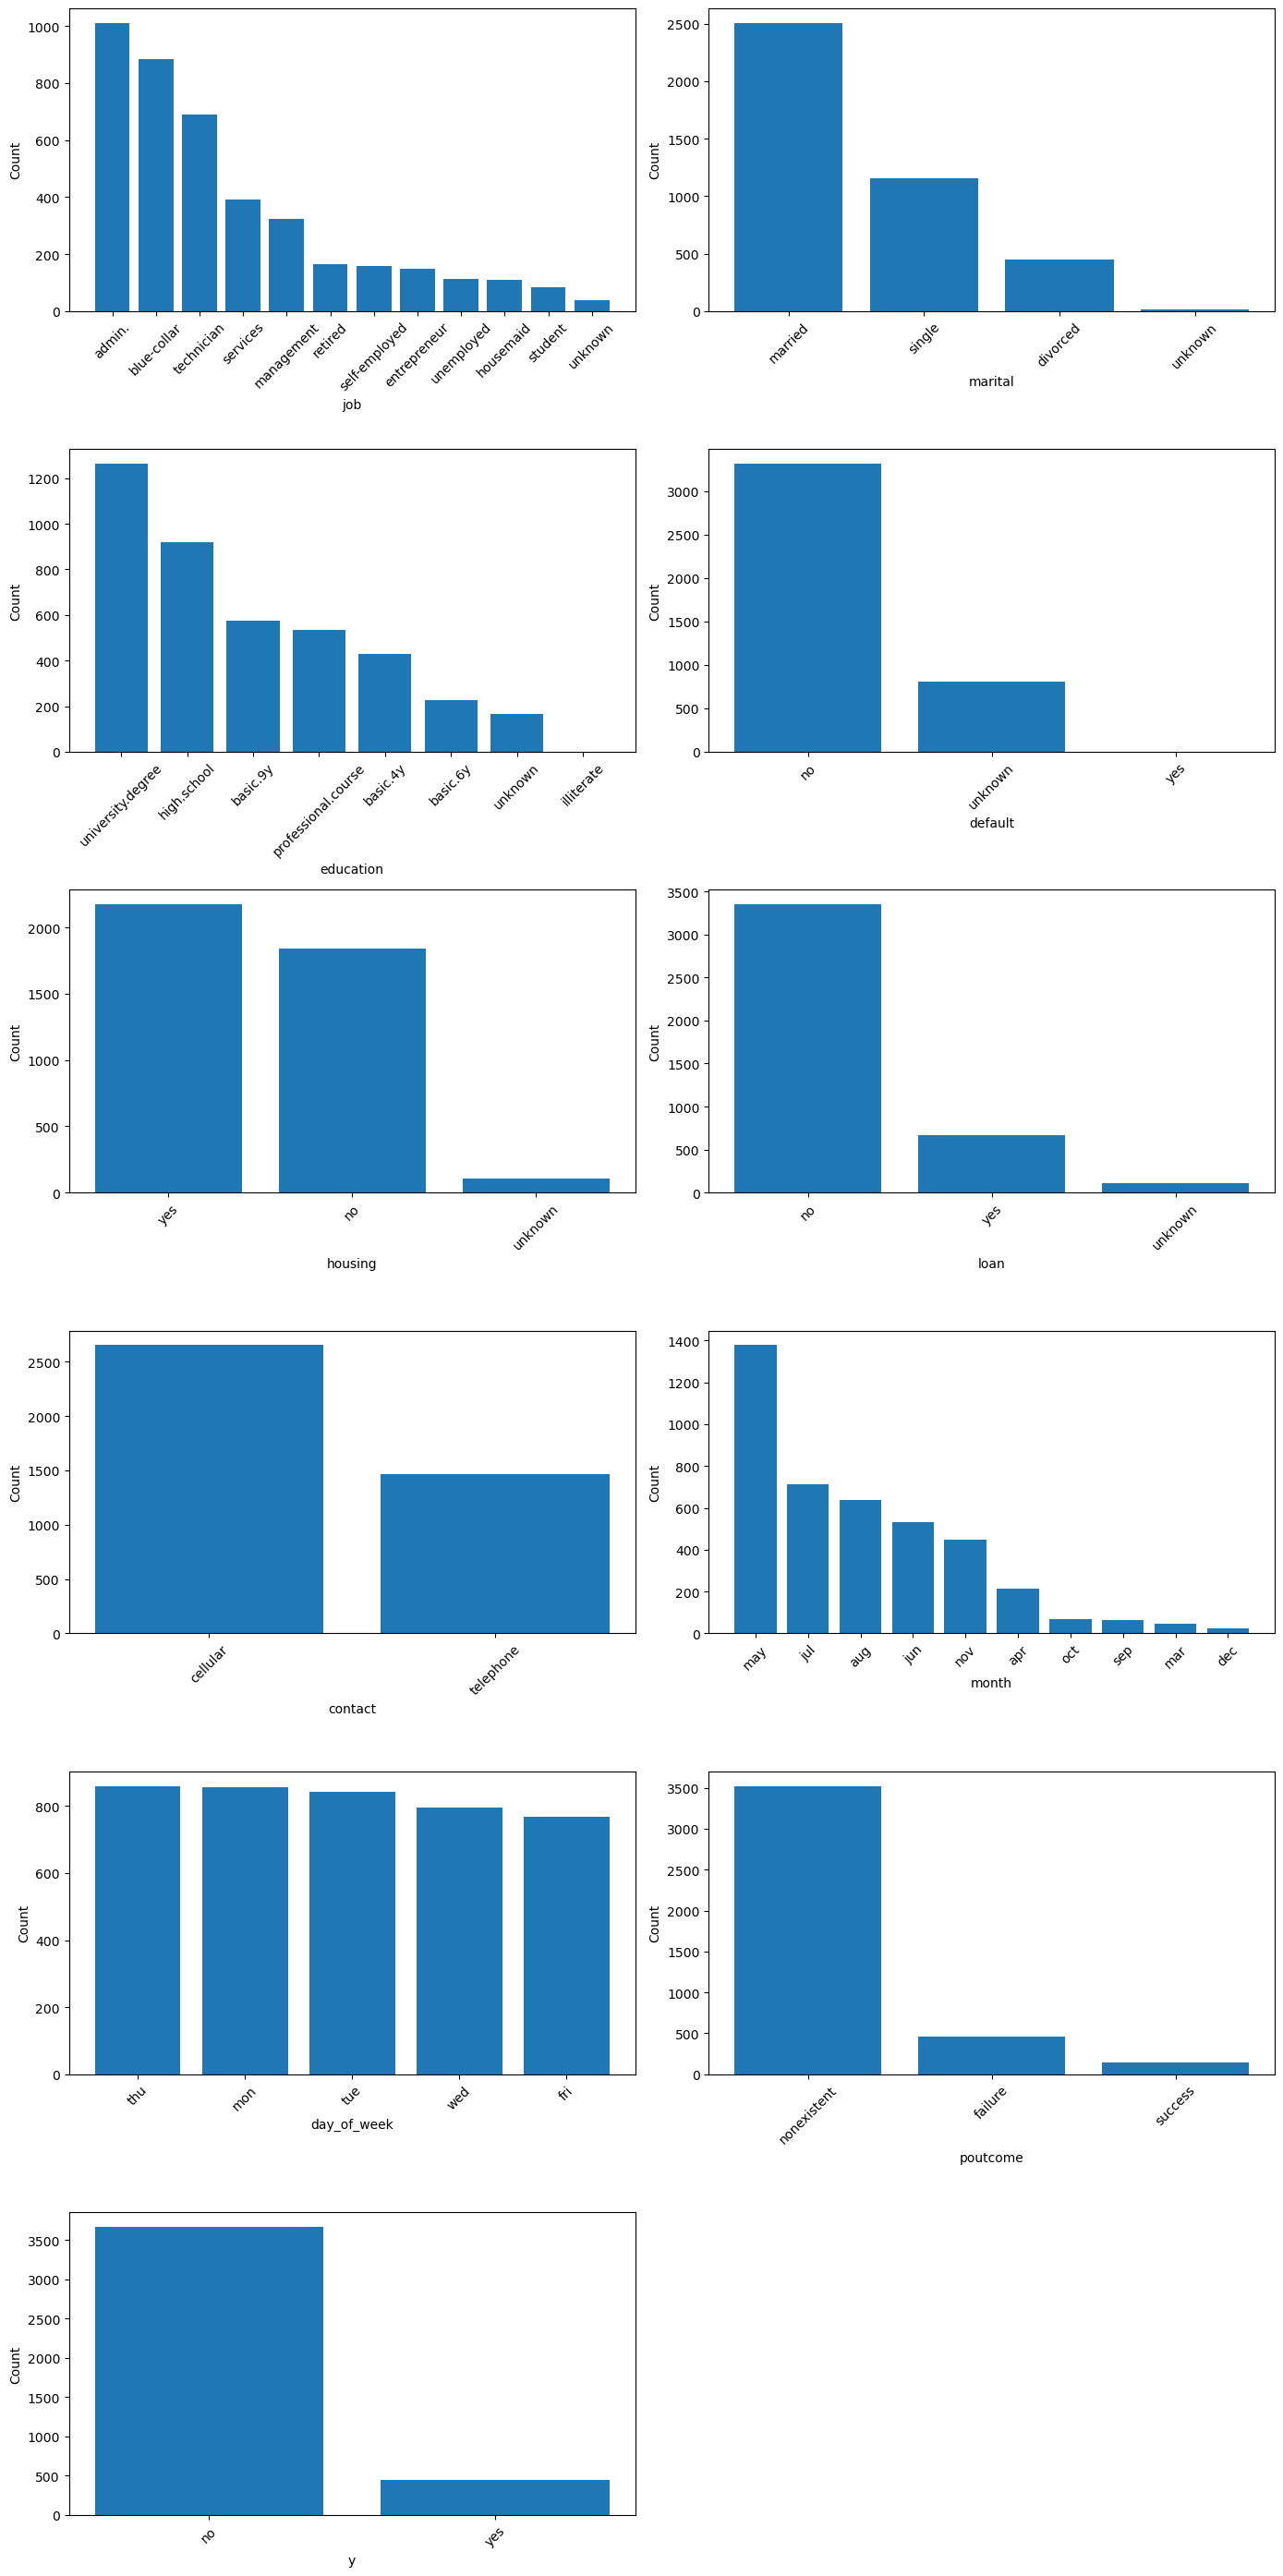

In [22]:
plt.figure(figsize = (14, 28))

for idx, col in enumerate(cols, start=1):
    plt.subplot(6, 2, idx)
    category_counts = df[col].value_counts()
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

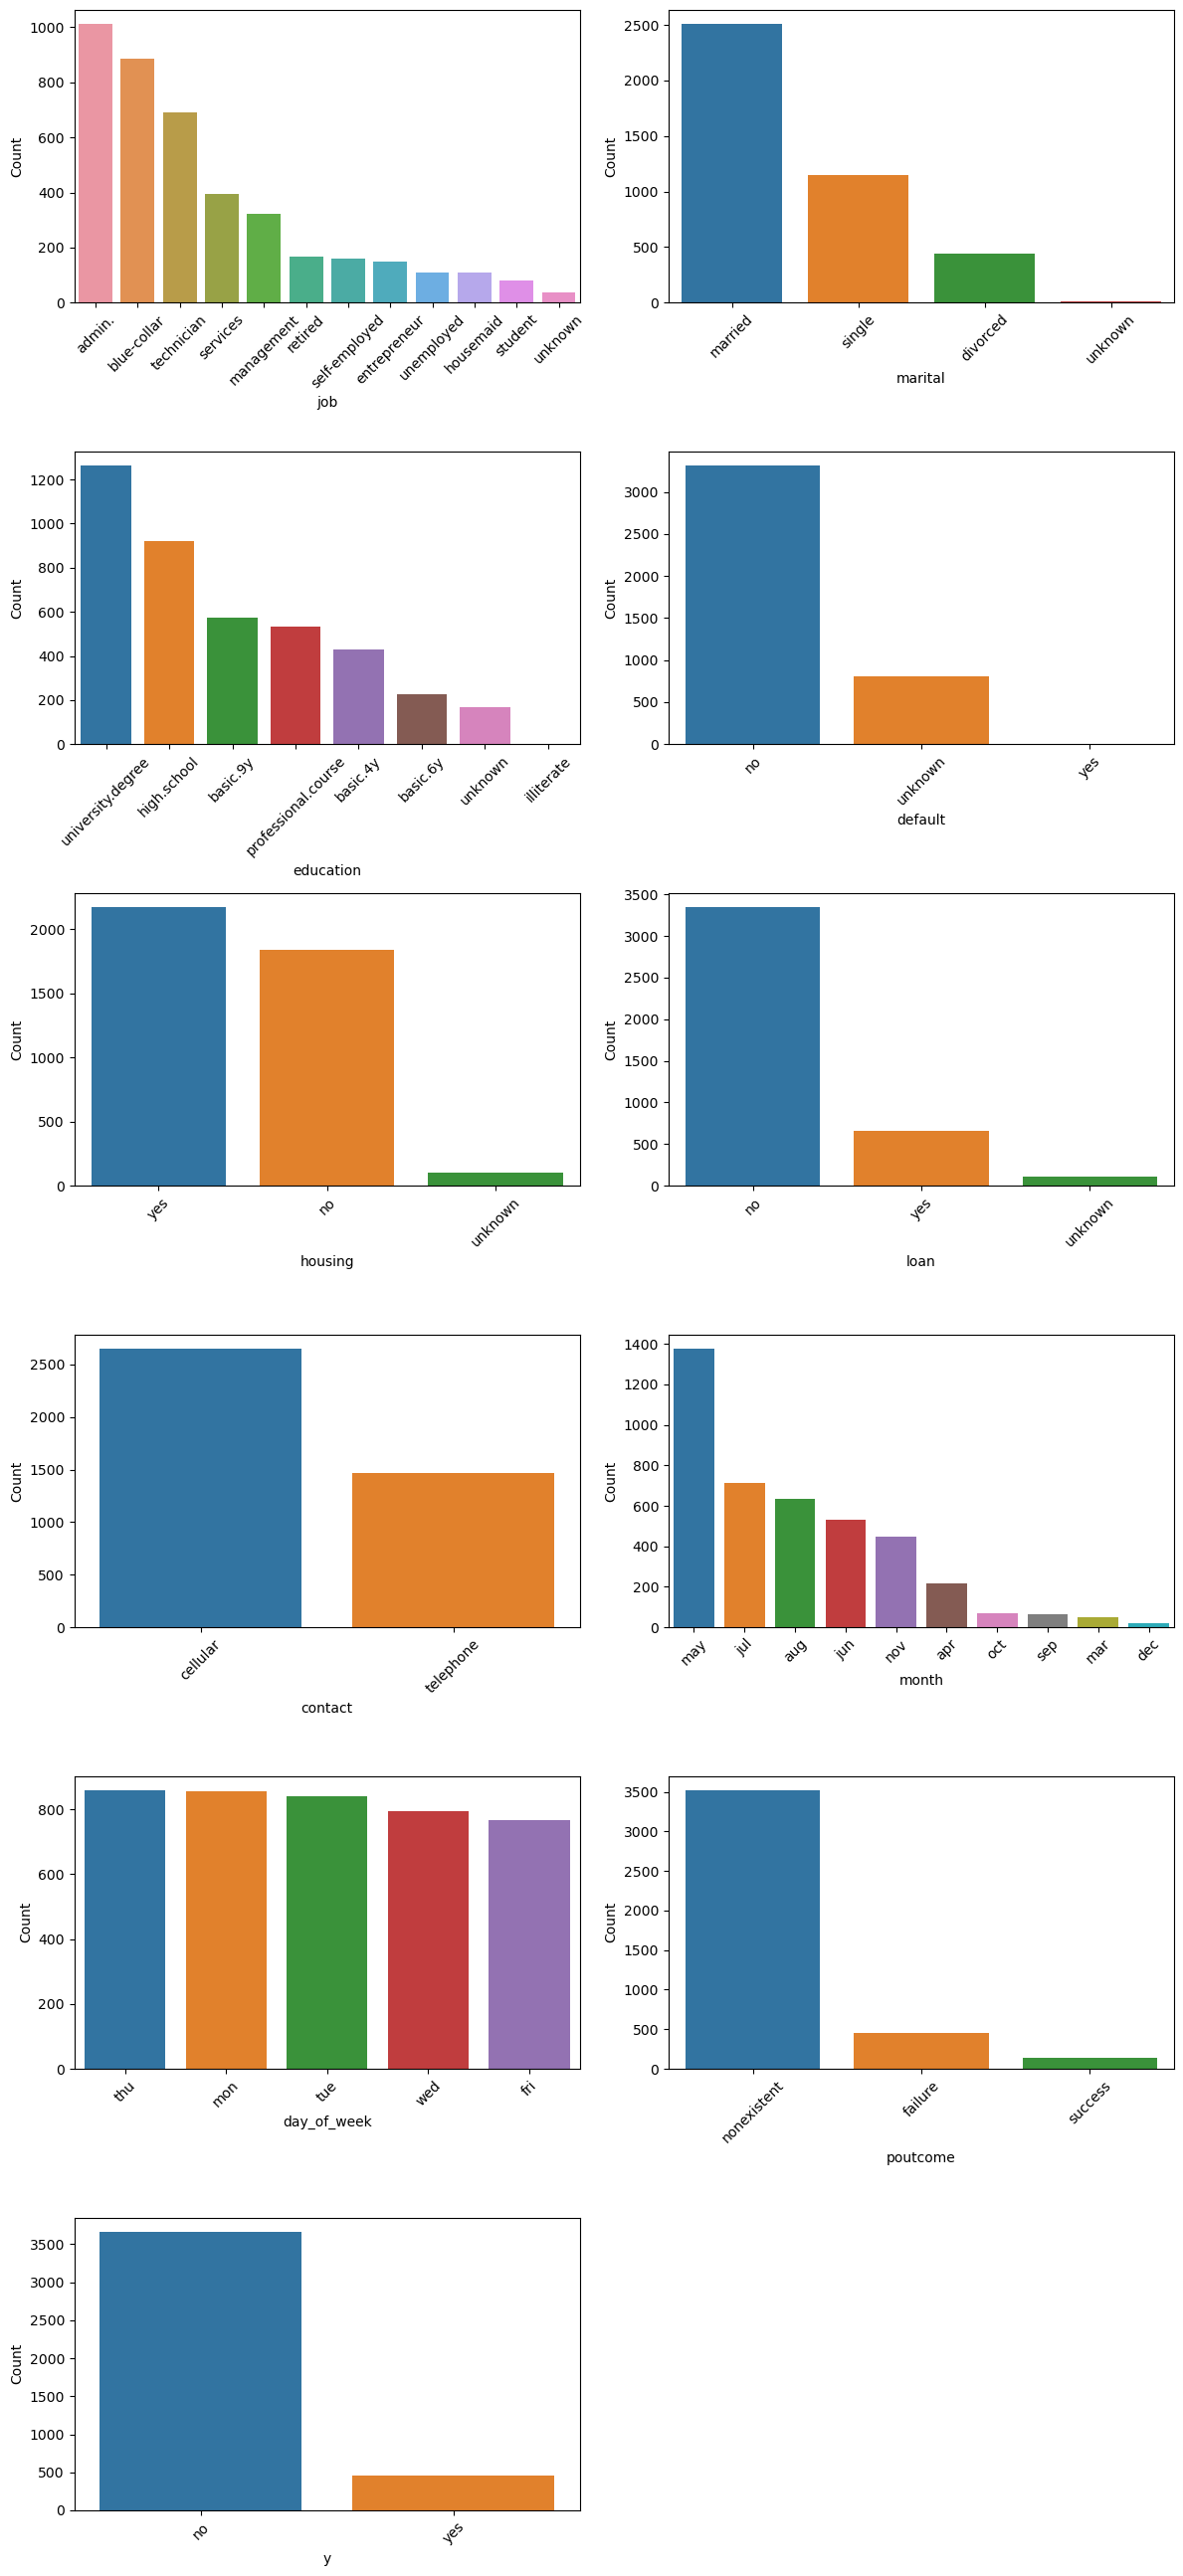

In [23]:
plt.figure(figsize = (12, 26))

for idx, col in enumerate(cols, start=1):
    plt.subplot(6, 2, idx)
    category_counts = df[col].value_counts()
    sns.countplot(df, x = col, order = category_counts.keys())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

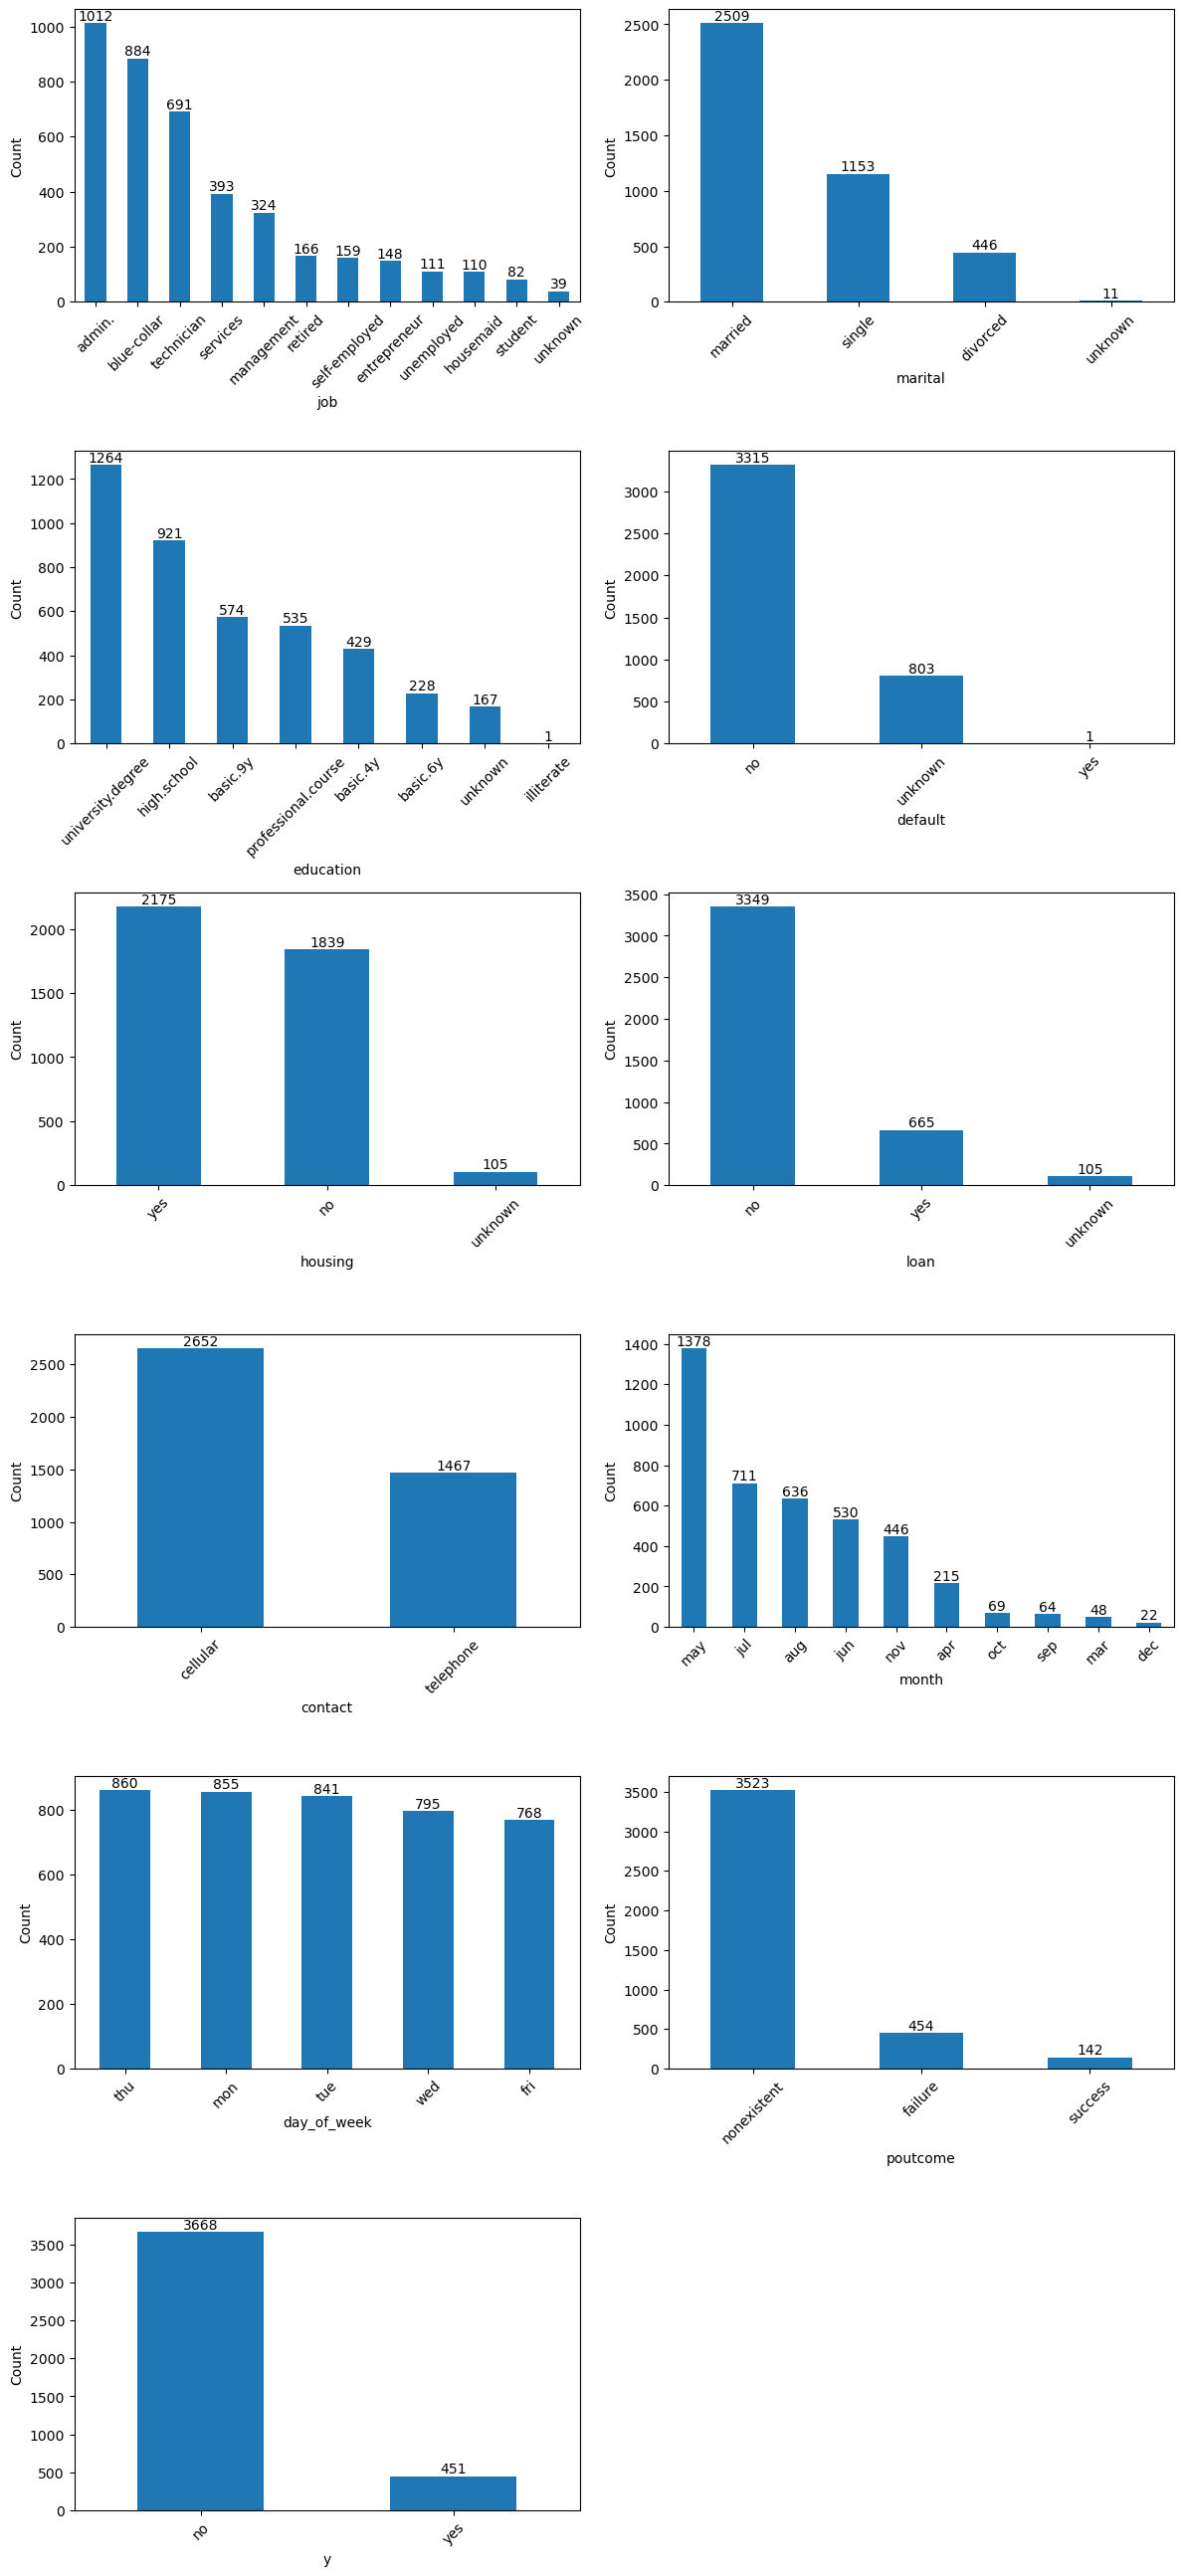

In [24]:
plt.figure(figsize = (12, 26))

for idx, col in enumerate(cols, start=1):
    plt.subplot(6, 2, idx)
    category_counts = df[col].value_counts()
    ax = category_counts.plot(kind ="bar")
    ax.bar_label(ax.containers[0])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

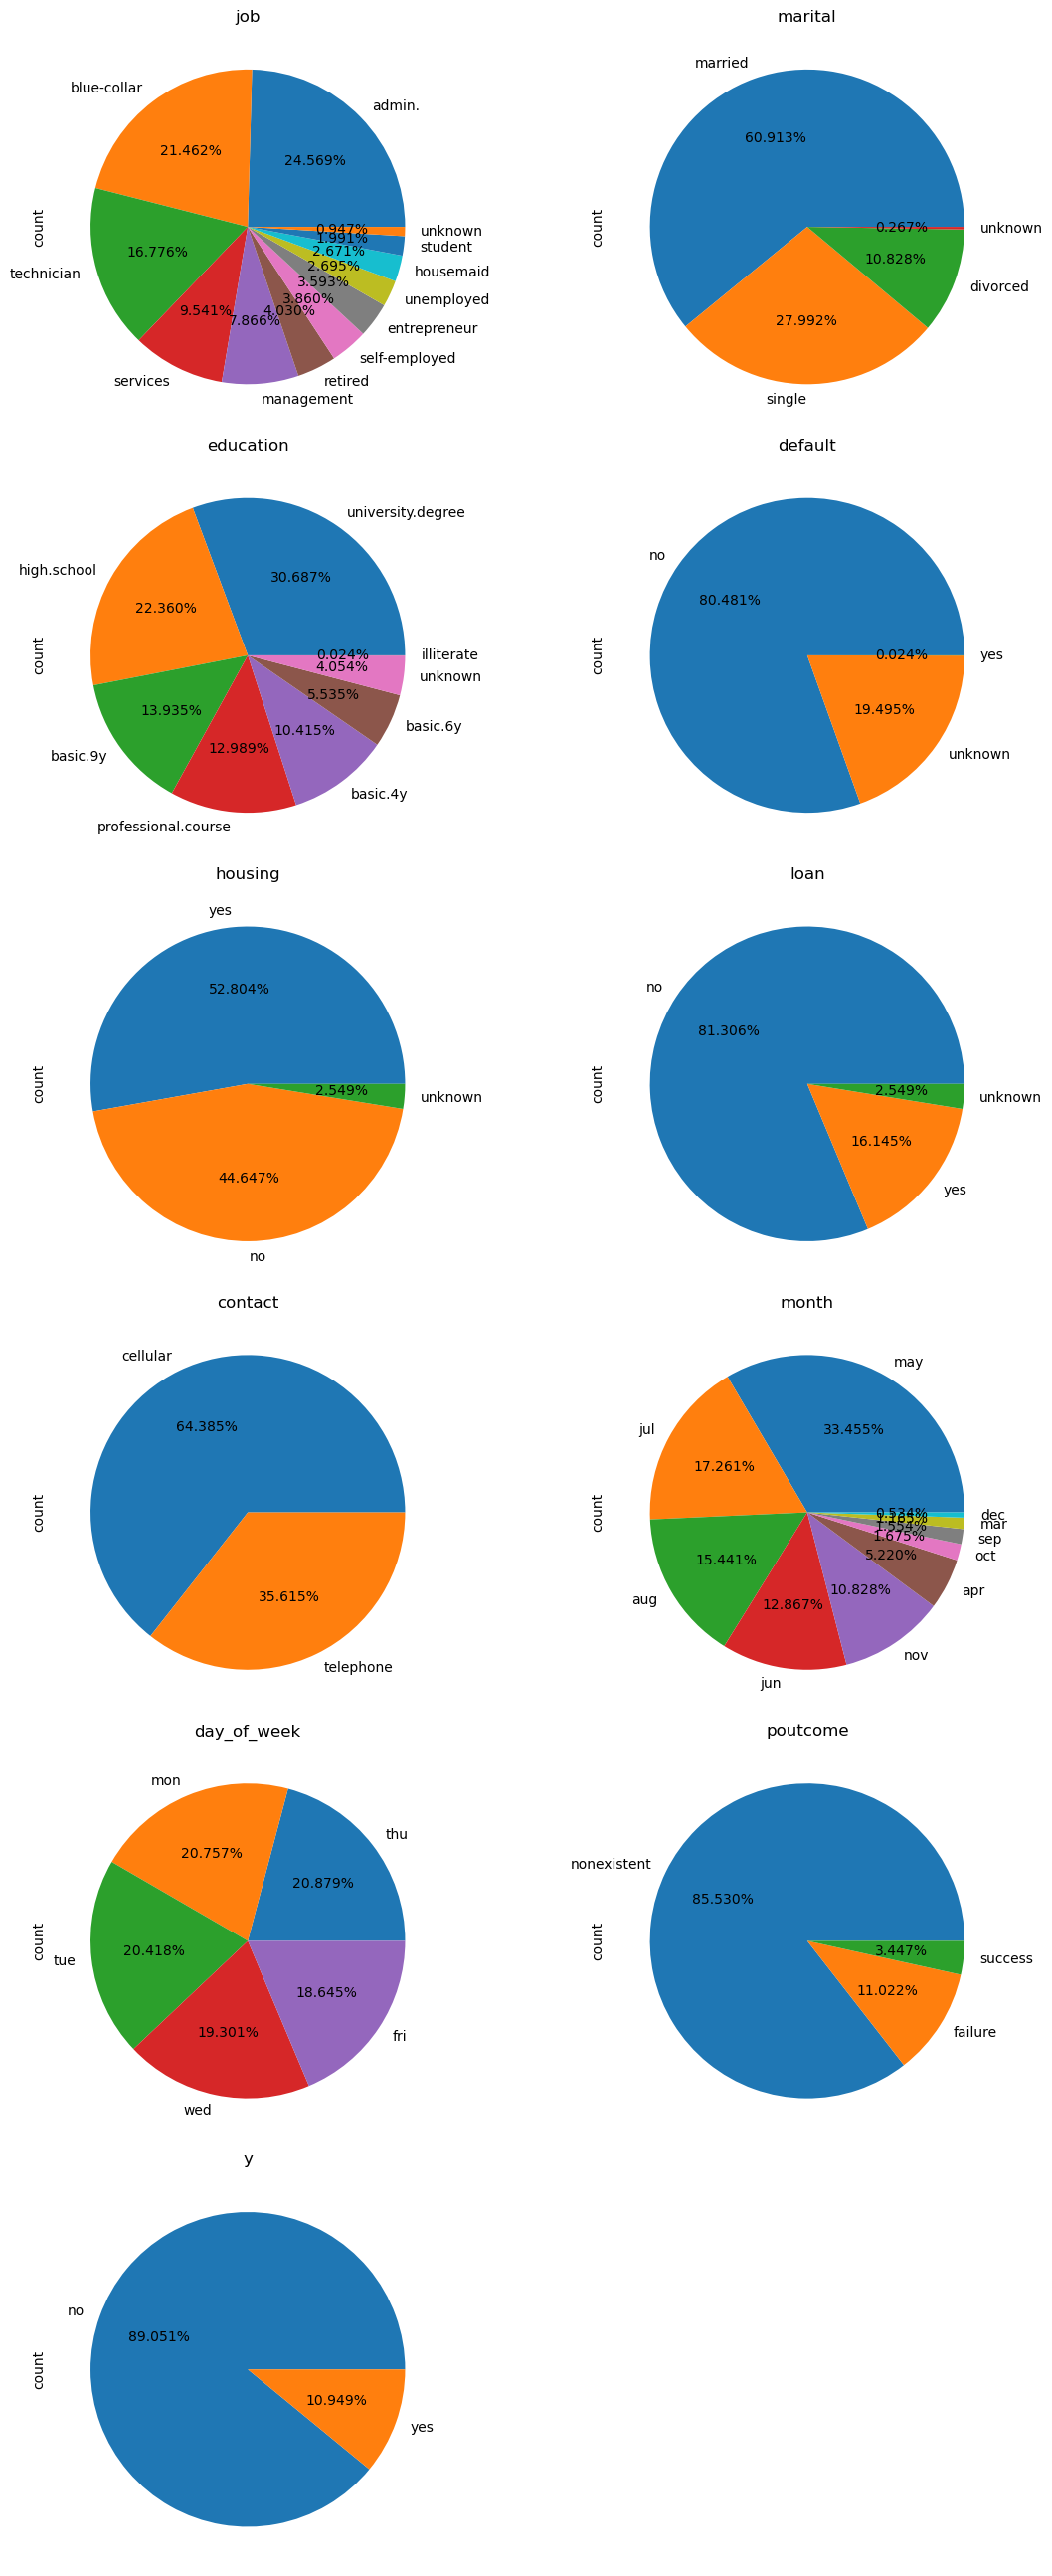

In [25]:
plt.figure(figsize = (12, 26))
for idx, col in enumerate(cols,1):
    plt.subplot(6, 2, idx)
    df[col].value_counts().plot(kind ="pie", autopct ="%0.3f%%", radius = 1)
    plt.title(col)
    
plt.tight_layout()
plt.show()

# Cross Tab

In [26]:
con1 = df["housing"]
# con2 = df["marital"]
con3 = df ["loan"]
con4 = df["y"]

In [27]:
con = [con3,con1]
pd.crosstab(con,con4)

y                  no  yes
loan    housing           
no      no       1406  178
        yes      1569  196
unknown unknown    96    9
yes     no        231   24
        yes       366   44

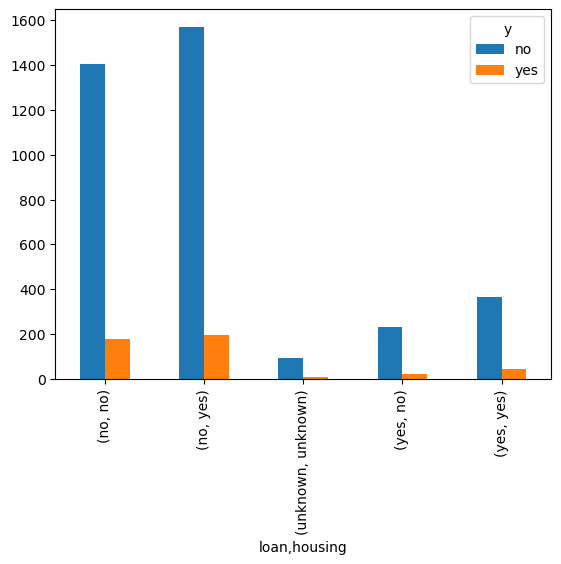

In [28]:
con_pb = pd.crosstab(con, con4)
con_pb.plot(kind = "bar")
plt.show()

# Analysis Through Visualization of Numerical Data

In [29]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
num_col = df.select_dtypes(exclude ="object").columns
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

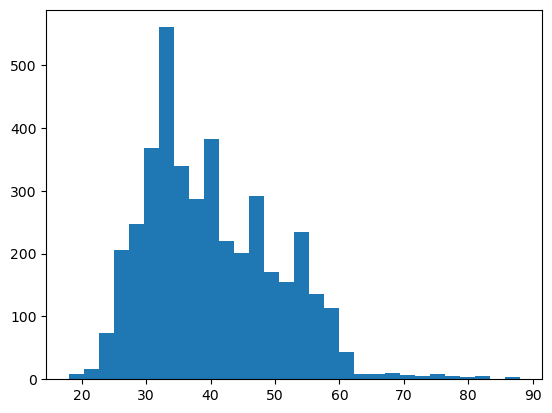

In [31]:
plt.hist(df["age"], bins = 30)
plt.show()

<Axes: ylabel='Frequency'>

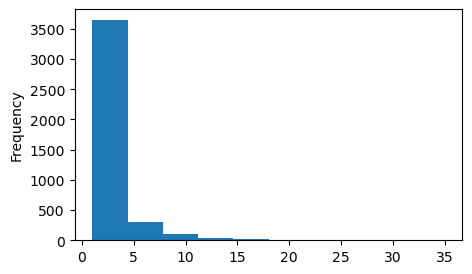

In [32]:
plt.figure(figsize = (5,3))
df["campaign"].plot(kind="hist")

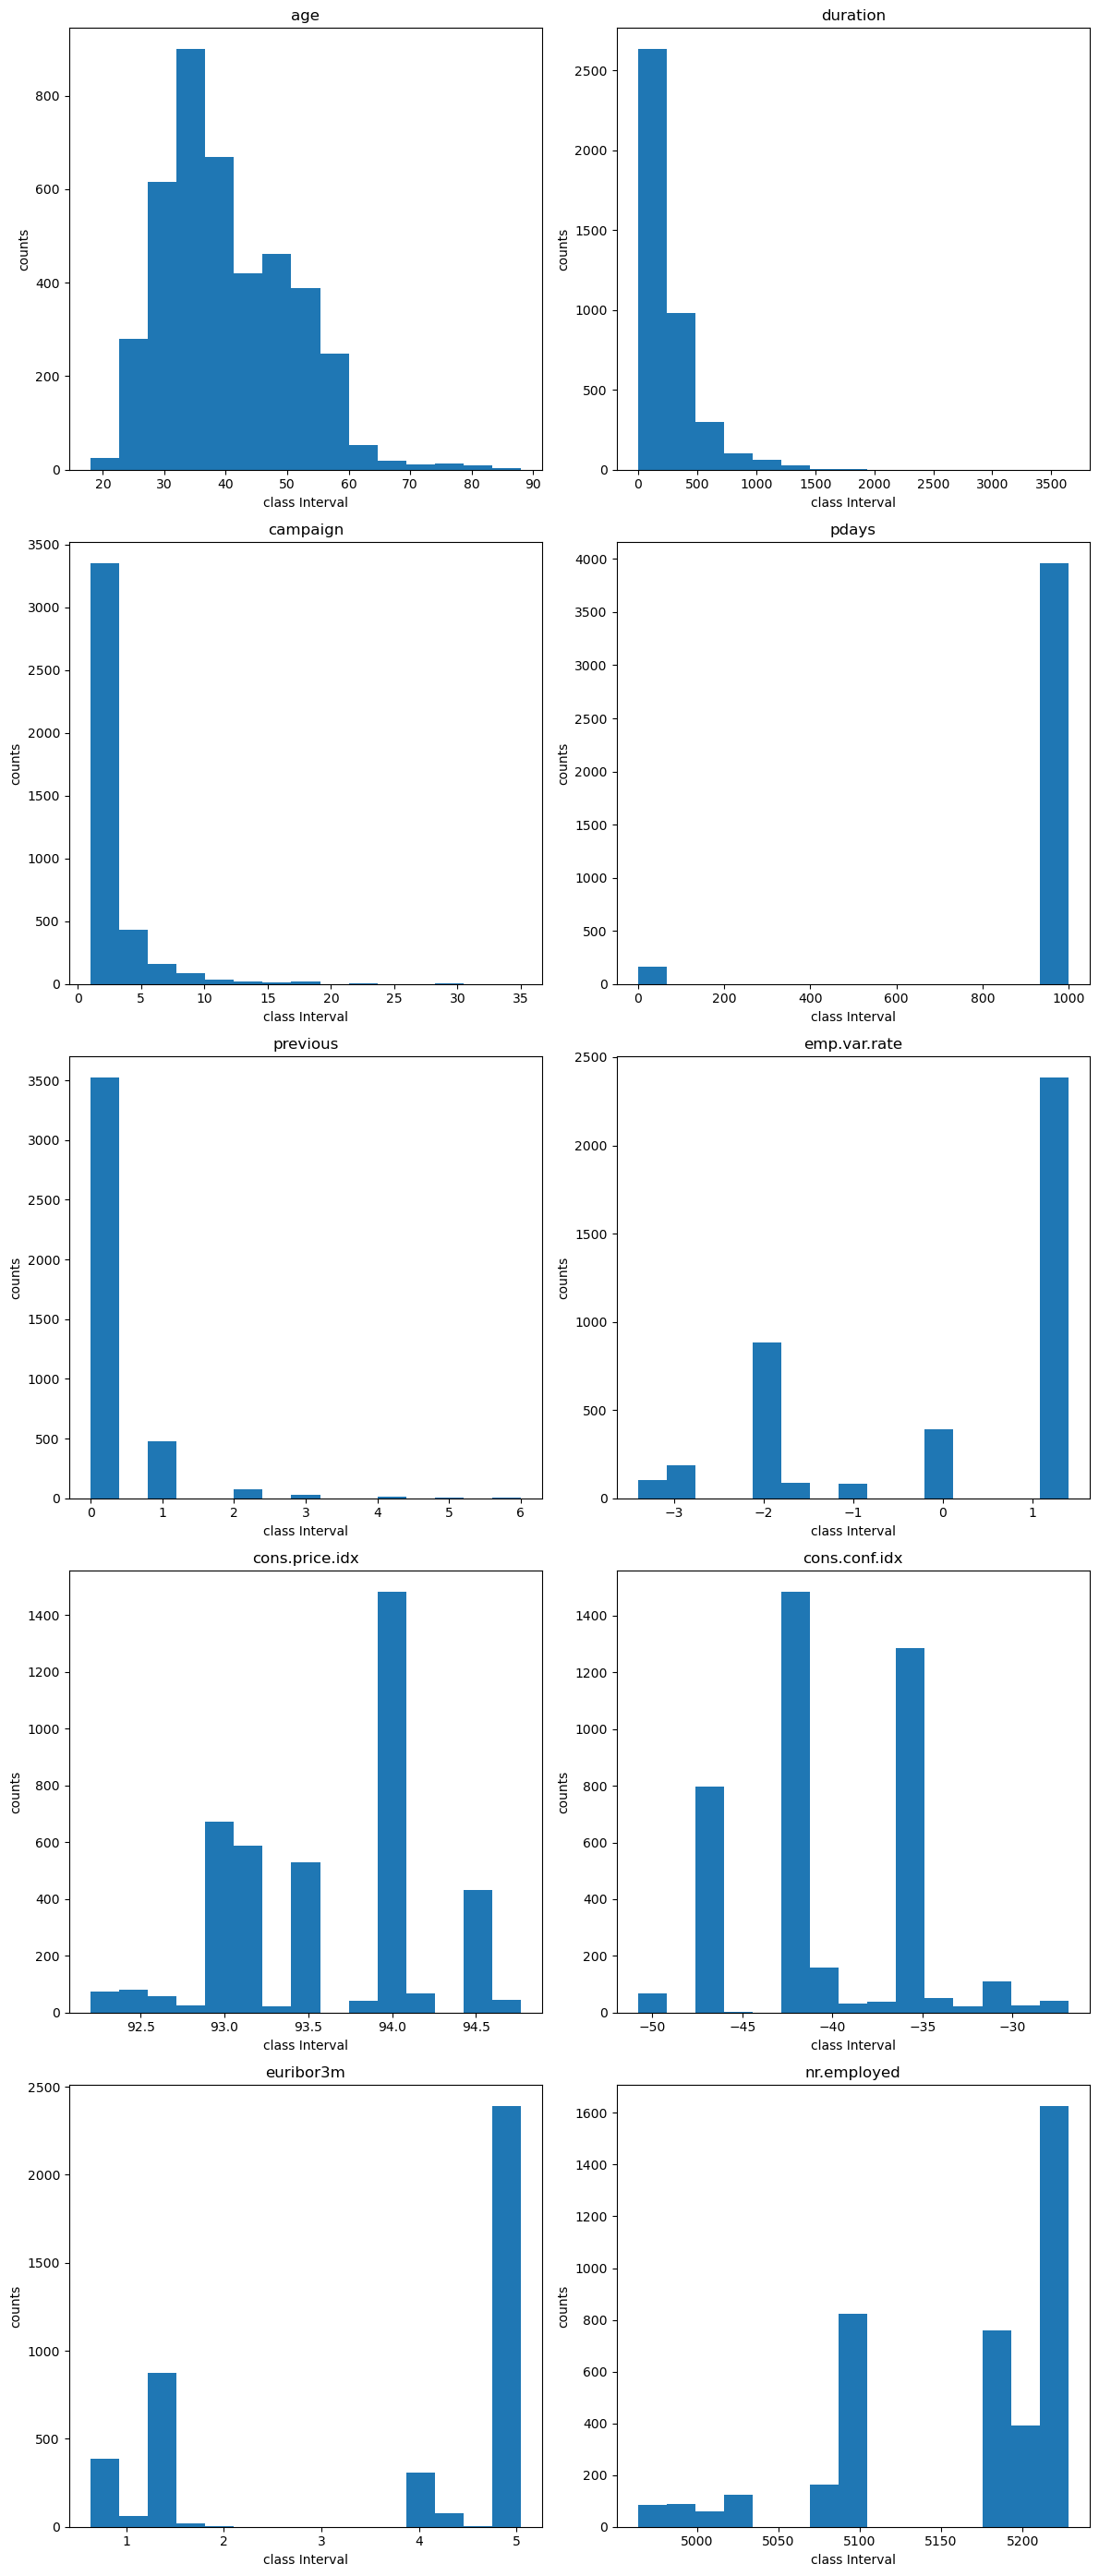

In [33]:
plt.figure(figsize = (12,28))

for index,col in enumerate(num_col,1):
    plt.subplot(5,2,index)
    plt.hist(df[col], bins = 15)
    plt.title(col)
    plt.xlabel("class Interval")
    plt.ylabel("counts")
    
    
plt.tight_layout()
plt.show()

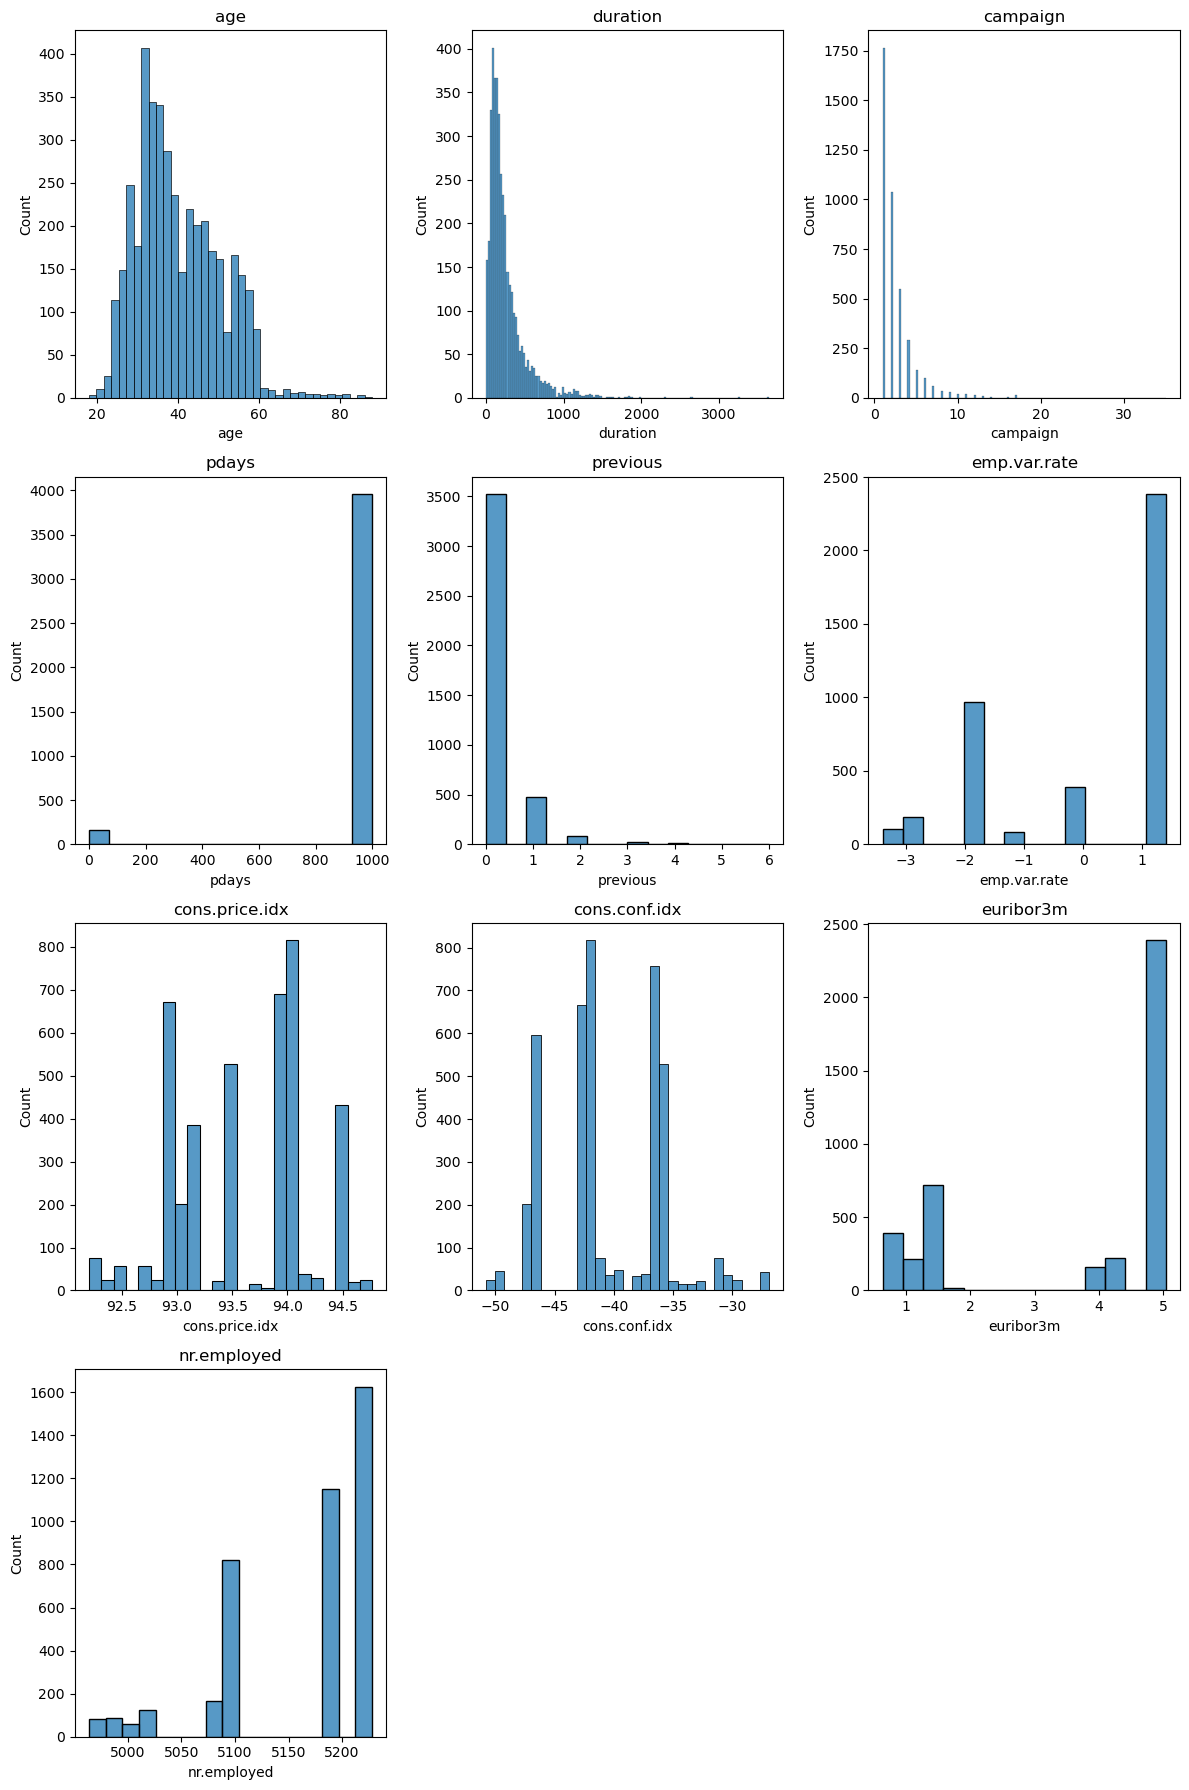

In [34]:
plt.figure(figsize=(12,18))

for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.histplot(df[names])
    plt.title(names)

plt.tight_layout()
plt.show()

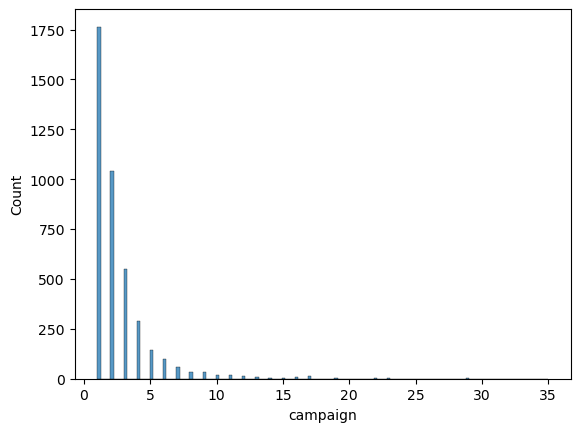

In [35]:
sns.histplot(df["campaign"])
plt.show()

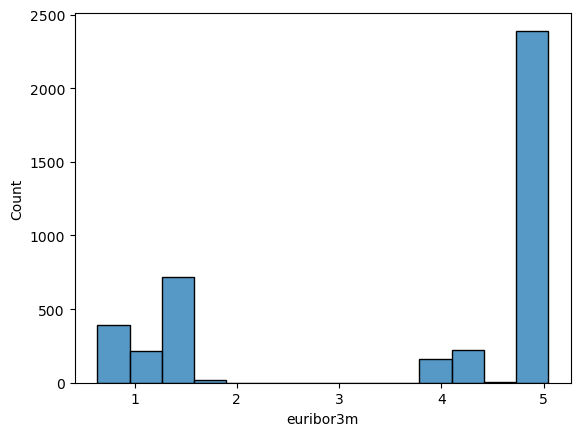

In [36]:
sns.histplot(df["euribor3m"])
plt.show()

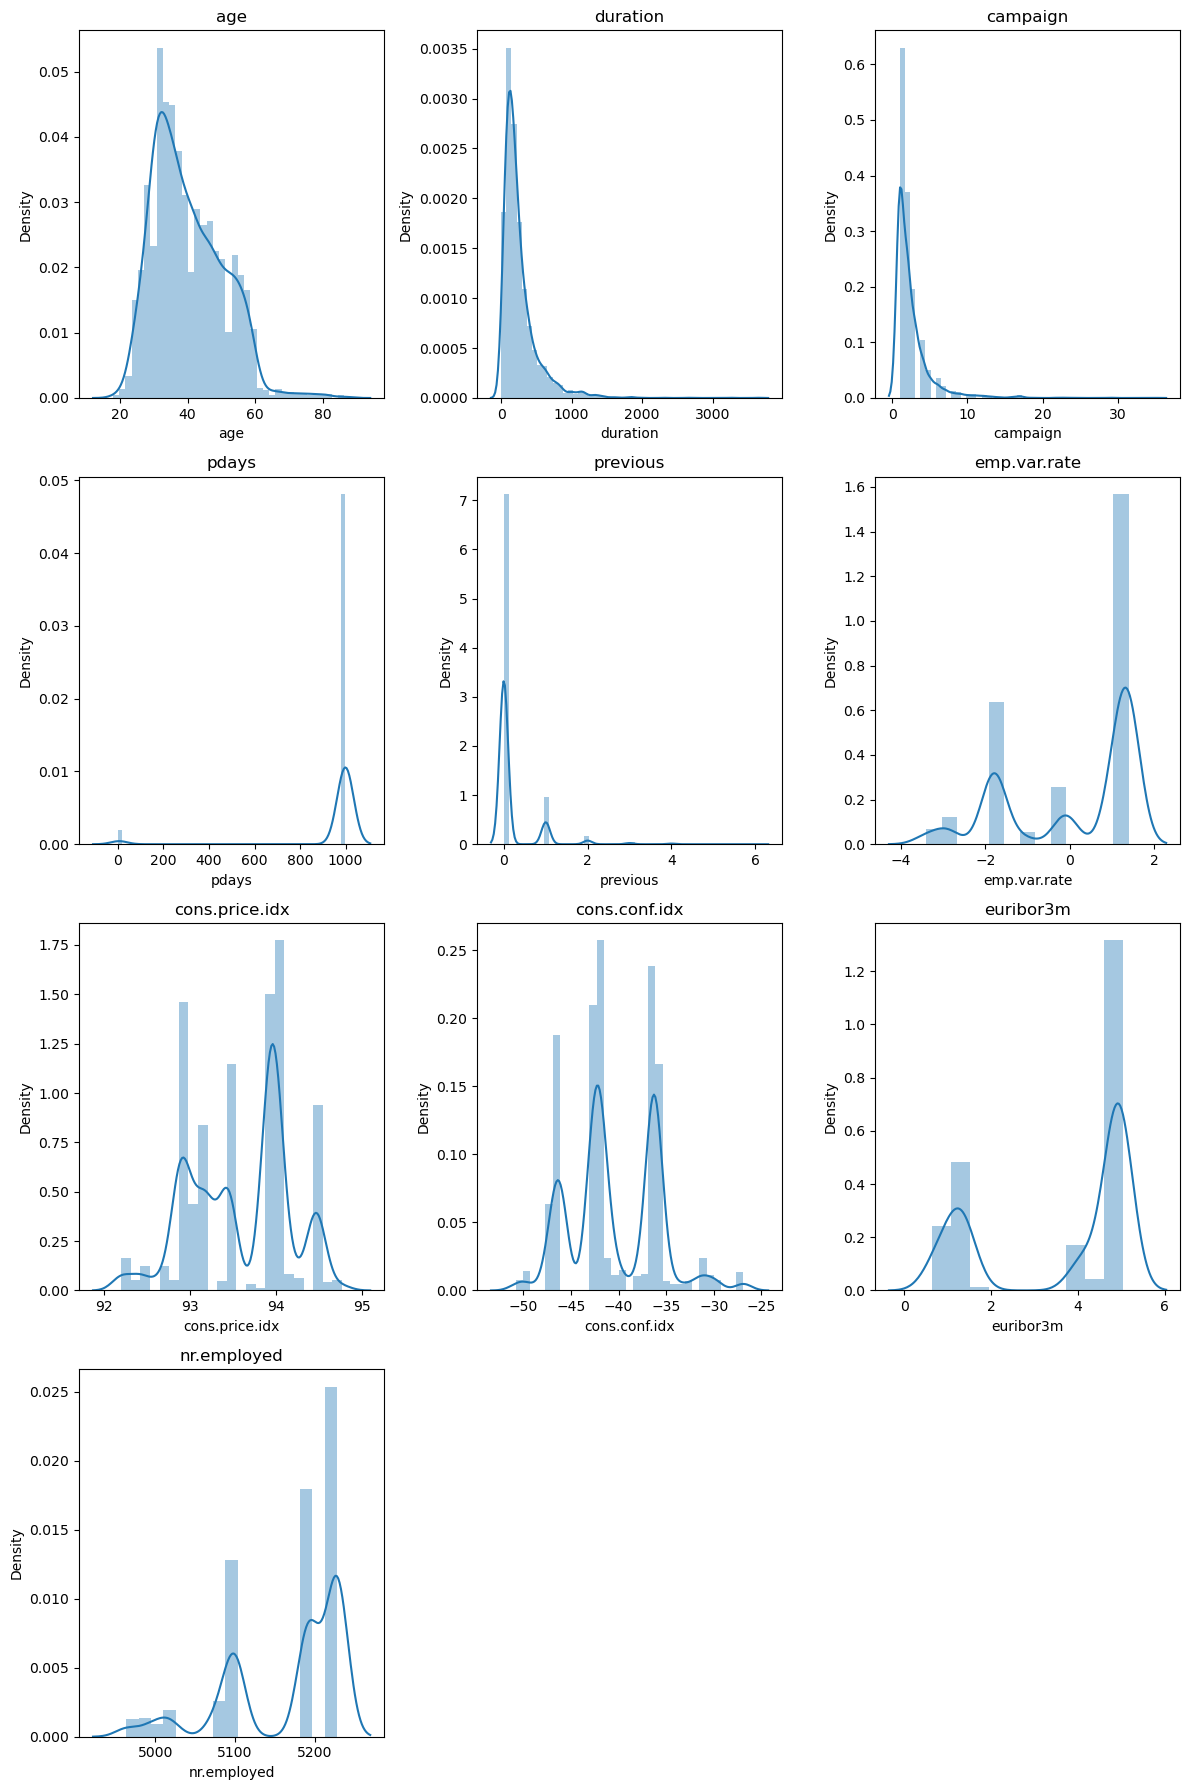

In [37]:
plt.figure(figsize = (12,18))

for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.distplot(df[names])
    plt.title(names)

plt.tight_layout()
plt.show()

In [38]:
for i in num_col:
    print(i,round(df[i].skew(),2))

age 0.72
duration 3.29
campaign 4.0
pdays -4.78
previous 4.02
emp.var.rate -0.73
cons.price.idx -0.22
cons.conf.idx 0.29
euribor3m -0.72
nr.employed -1.08


# Outlairs Analysis

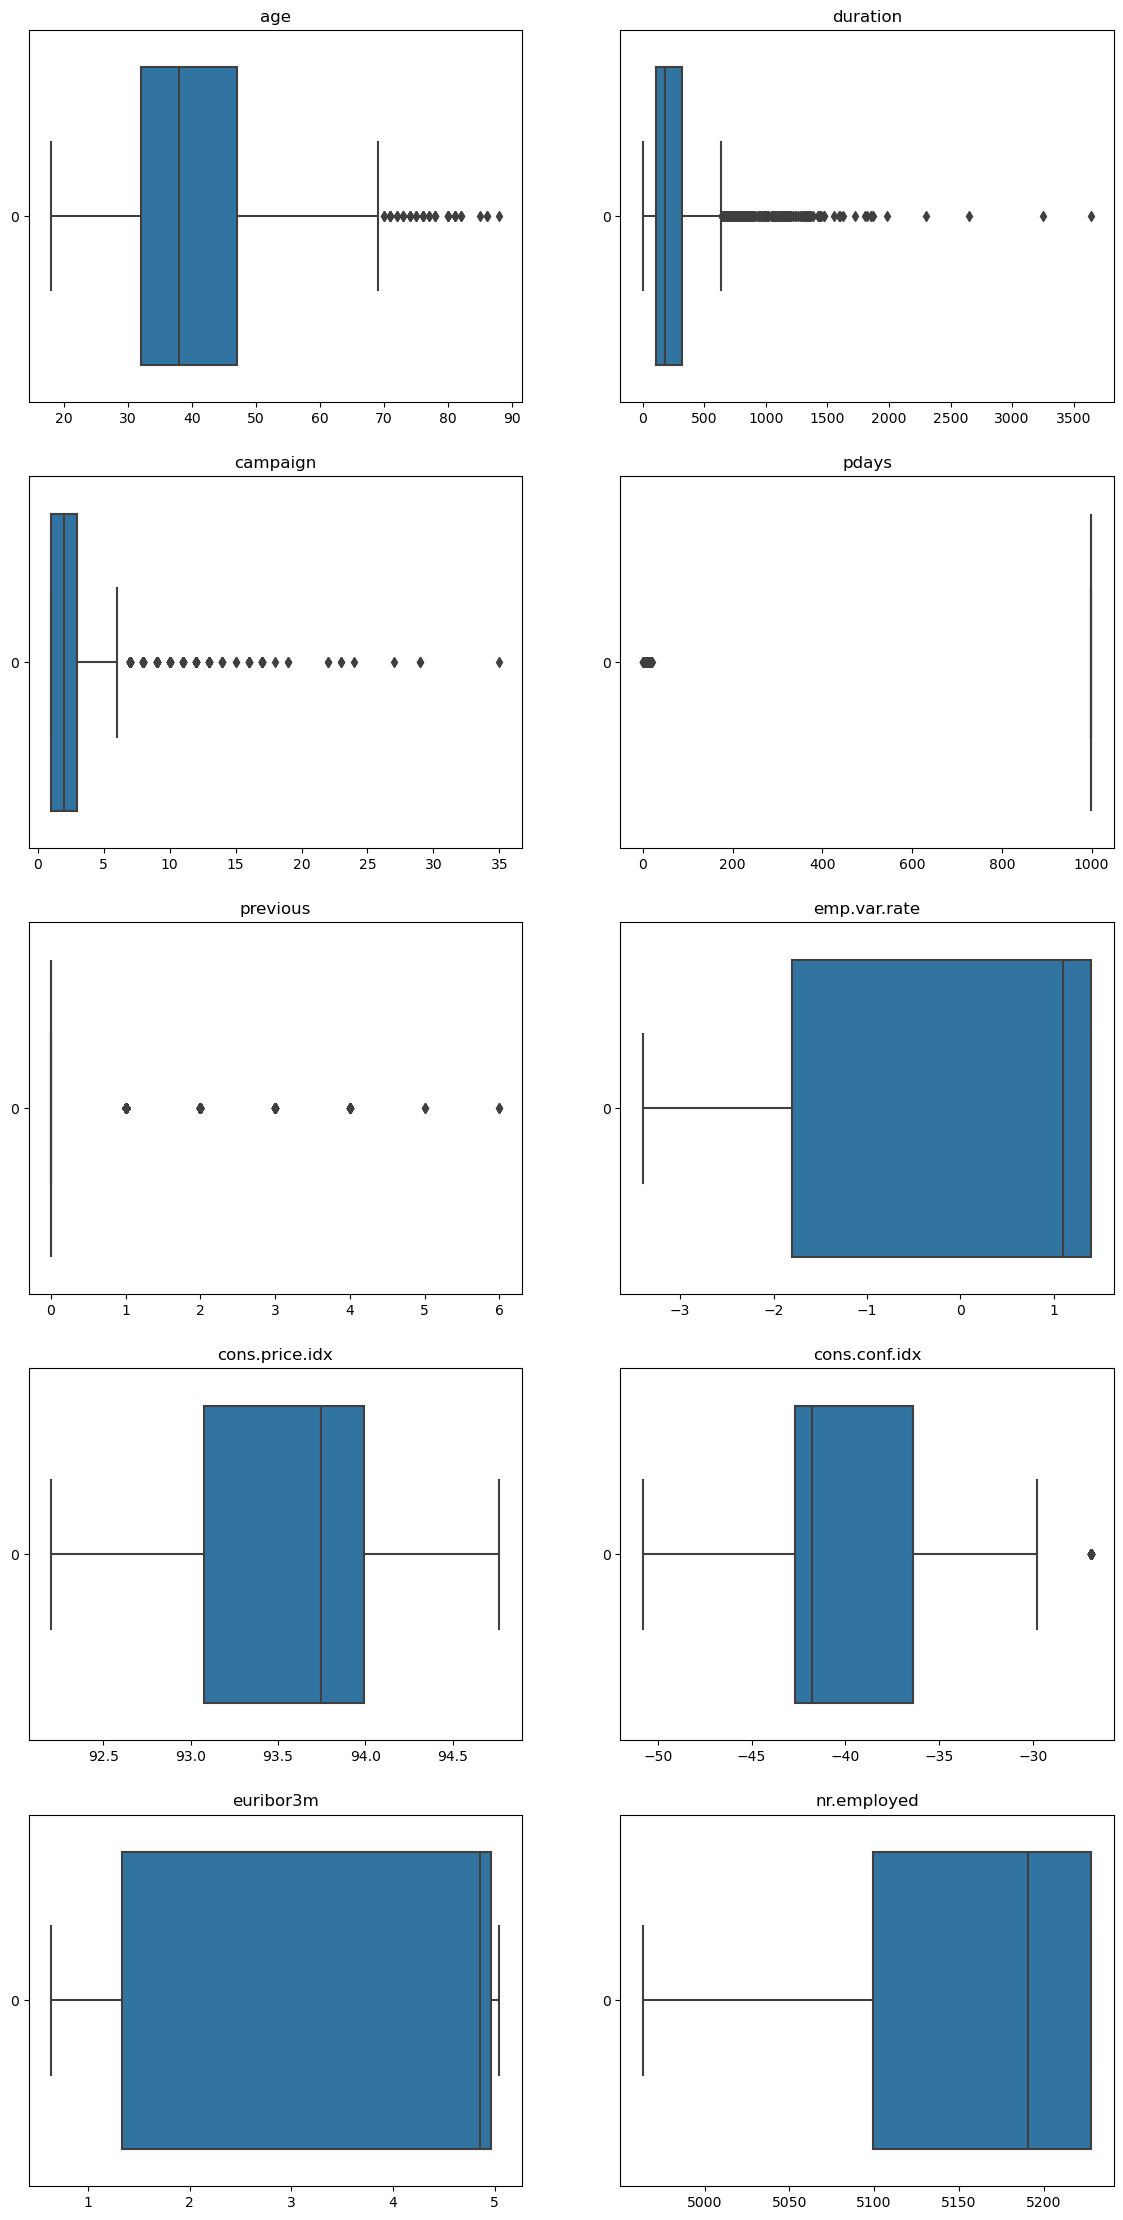

In [39]:
plt.figure(figsize = (14,28))

for index,cols in enumerate( num_col,1):
    plt.subplot(5,2,index)
    sns.boxplot(df[cols], orient = "h")
    plt.title(cols)

plt.show()

# Data Transformation

# Identfy outlairs and replace with median values

In [40]:
df_copy = df.copy()
for i in num_col: 
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    print(q1,q3)
 
    iqr = q3-q1
    print(iqr)

    lb = q1-1.5*iqr
    ub = q3+1.5*iqr
    print(lb,ub)

    con1 = df[i]<lb
    con2 = df[i]>ub
    outlairs = df[con1 | con2]
    print(len(outlairs))
 
    con = con1 | con2
    median = df[i].median()
    new = np.where(con,median,df[i])
        
    df_copy[i] = new

32.0 47.0
15.0
9.5 69.5
39
103.0 317.0
214.0
-218.0 638.0
291
1.0 3.0
2.0
-2.0 6.0
235
999.0 999.0
0.0
999.0 999.0
160
0.0 0.0
0.0
0.0 0.0
596
-1.8 1.4
3.2
-6.6000000000000005 6.200000000000001
0
93.075 93.994
0.9189999999999969
91.69650000000001 95.3725
0
-42.7 -36.4
6.300000000000004
-52.150000000000006 -26.949999999999992
43
1.334 4.961
3.6270000000000002
-4.1065000000000005 10.4015
0
5099.1 5228.1
129.0
4905.6 5421.6
0


***Check the skewness of data after replacing outlairs with median values***

In [41]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewnewss original:{original} after Median:{after}")

Skewnewss original:0.72 after Median:0.44
Skewnewss original:3.29 after Median:1.1
Skewnewss original:4.0 after Median:1.33
Skewnewss original:-4.78 after Median:0.0
Skewnewss original:4.02 after Median:0.0
Skewnewss original:-0.73 after Median:-0.73
Skewnewss original:-0.22 after Median:-0.22
Skewnewss original:0.29 after Median:0.13
Skewnewss original:-0.72 after Median:-0.72
Skewnewss original:-1.08 after Median:-1.08


In [42]:
df_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
df_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.0,4119.0,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,39.746540,201.982763,2.045885,999.0,0.0,0.084972,93.579704,-40.654649,3.621356,5166.481695
std,9.660751,135.155498,1.239852,0.0,0.0,1.563114,0.579349,4.378644,1.733591,73.667904
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,262.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,638.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


***plot the skewness of data after replacing outlairs with median values***

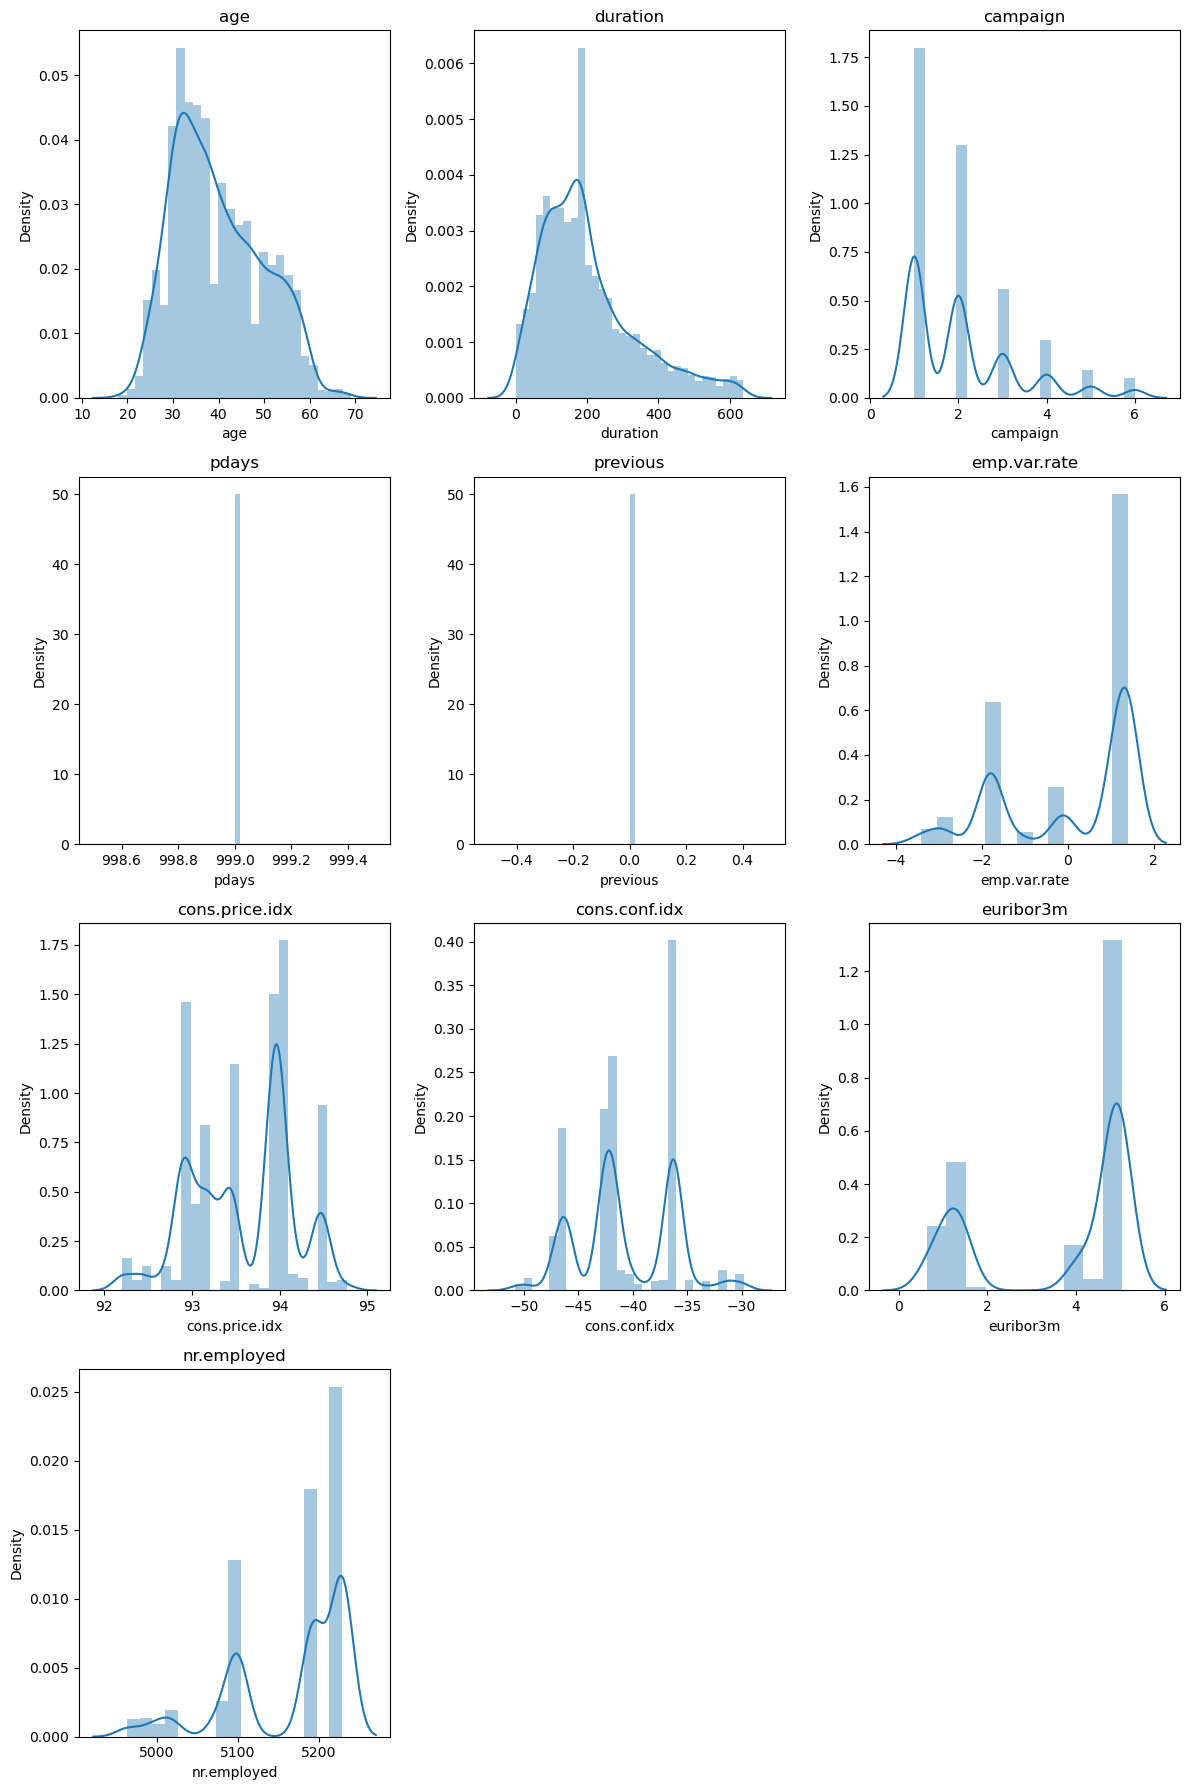

In [44]:
plt.figure(figsize = (12,18))

for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.distplot(df_copy[names])
    plt.title(names)
    
plt.tight_layout()
plt.show()

***Boxplot of data after replacing outlairs with median values***

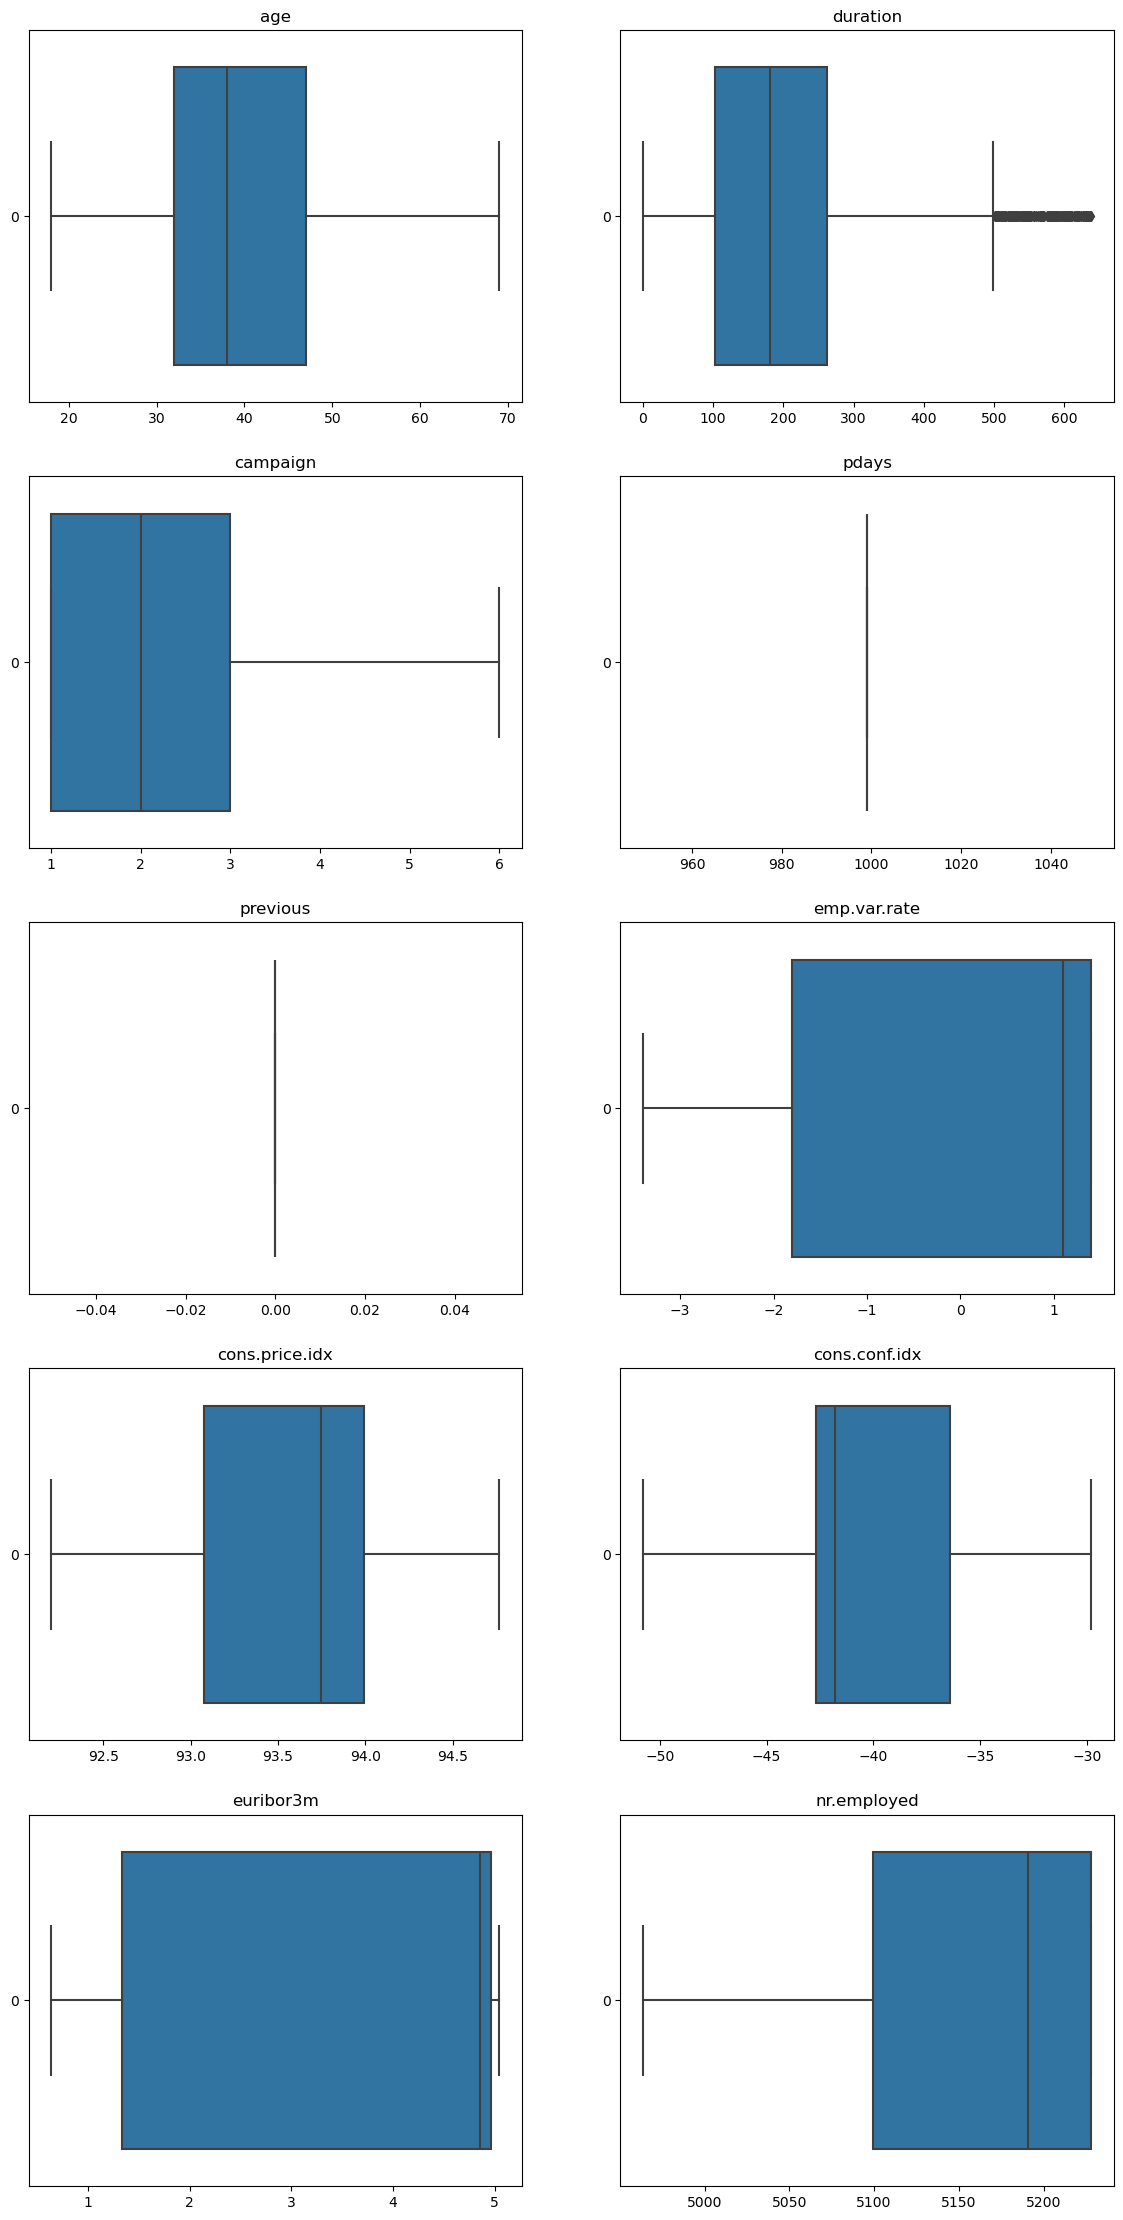

In [45]:
plt.figure(figsize = (14,28))
for index,cols in enumerate( num_col,1):
    plt.subplot(5,2,index)
    sns.boxplot(df_copy[cols],orient="h")
    plt.title(cols)

plt.show()

# Followings are transformation techniques

- log transformation
- exponential transformation
- reciprocal transformation
- square root transformation
- power transformation
 
      - box cox
  
      - Yeo jhonson 

In [46]:
cat_cols = df.select_dtypes(exclude = "object").columns
cat_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# log transformation

***we use log transformation only on positive value like age***

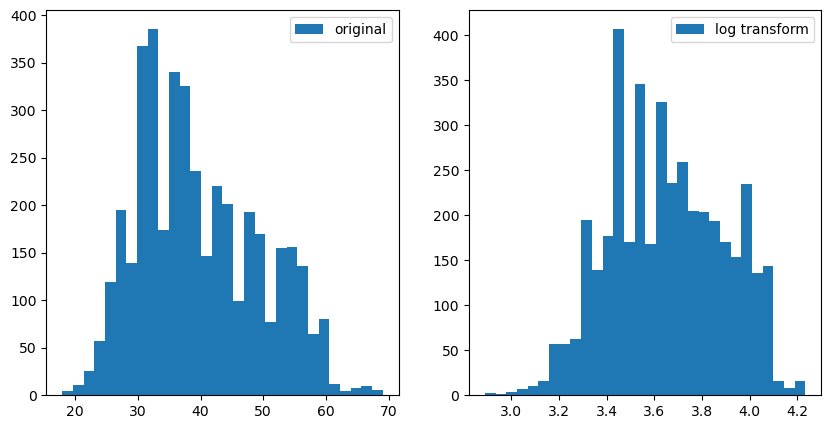

In [47]:
plt.figure(figsize = (10,5))
log_data = np.log(df_copy["age"])

plt.subplot(1,2,1).hist(df_copy["age"], bins = 30, label = "original")
plt.legend()
plt.subplot(1,2,2).hist(log_data, bins = 30, label = "log transform")
plt.legend()

plt.show()

# square root transformation

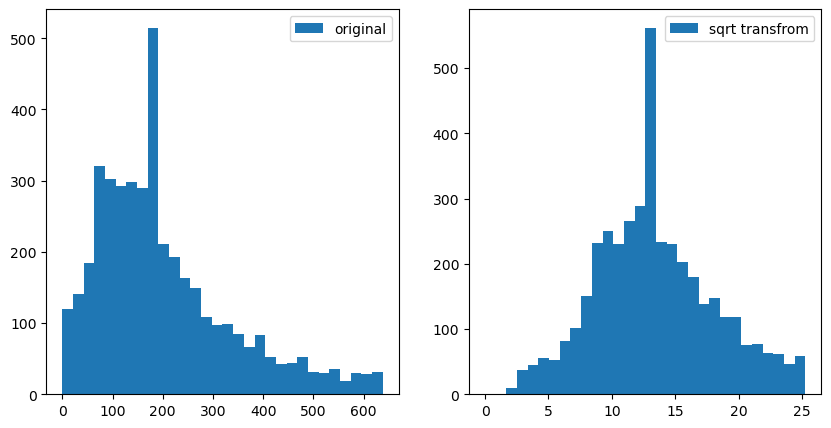

In [48]:
plt.figure(figsize = (10,5))
sqrt_data = np.sqrt(df_copy["duration"])

plt.subplot(1,2,1).hist(df_copy["duration"], bins = 30, label ="original")
plt.legend()

plt.subplot(1,2,2).hist(sqrt_data, bins=30, label = "sqrt transfrom")
plt.legend()

plt.show()

# Observation

**Square root gives a great value transformation**

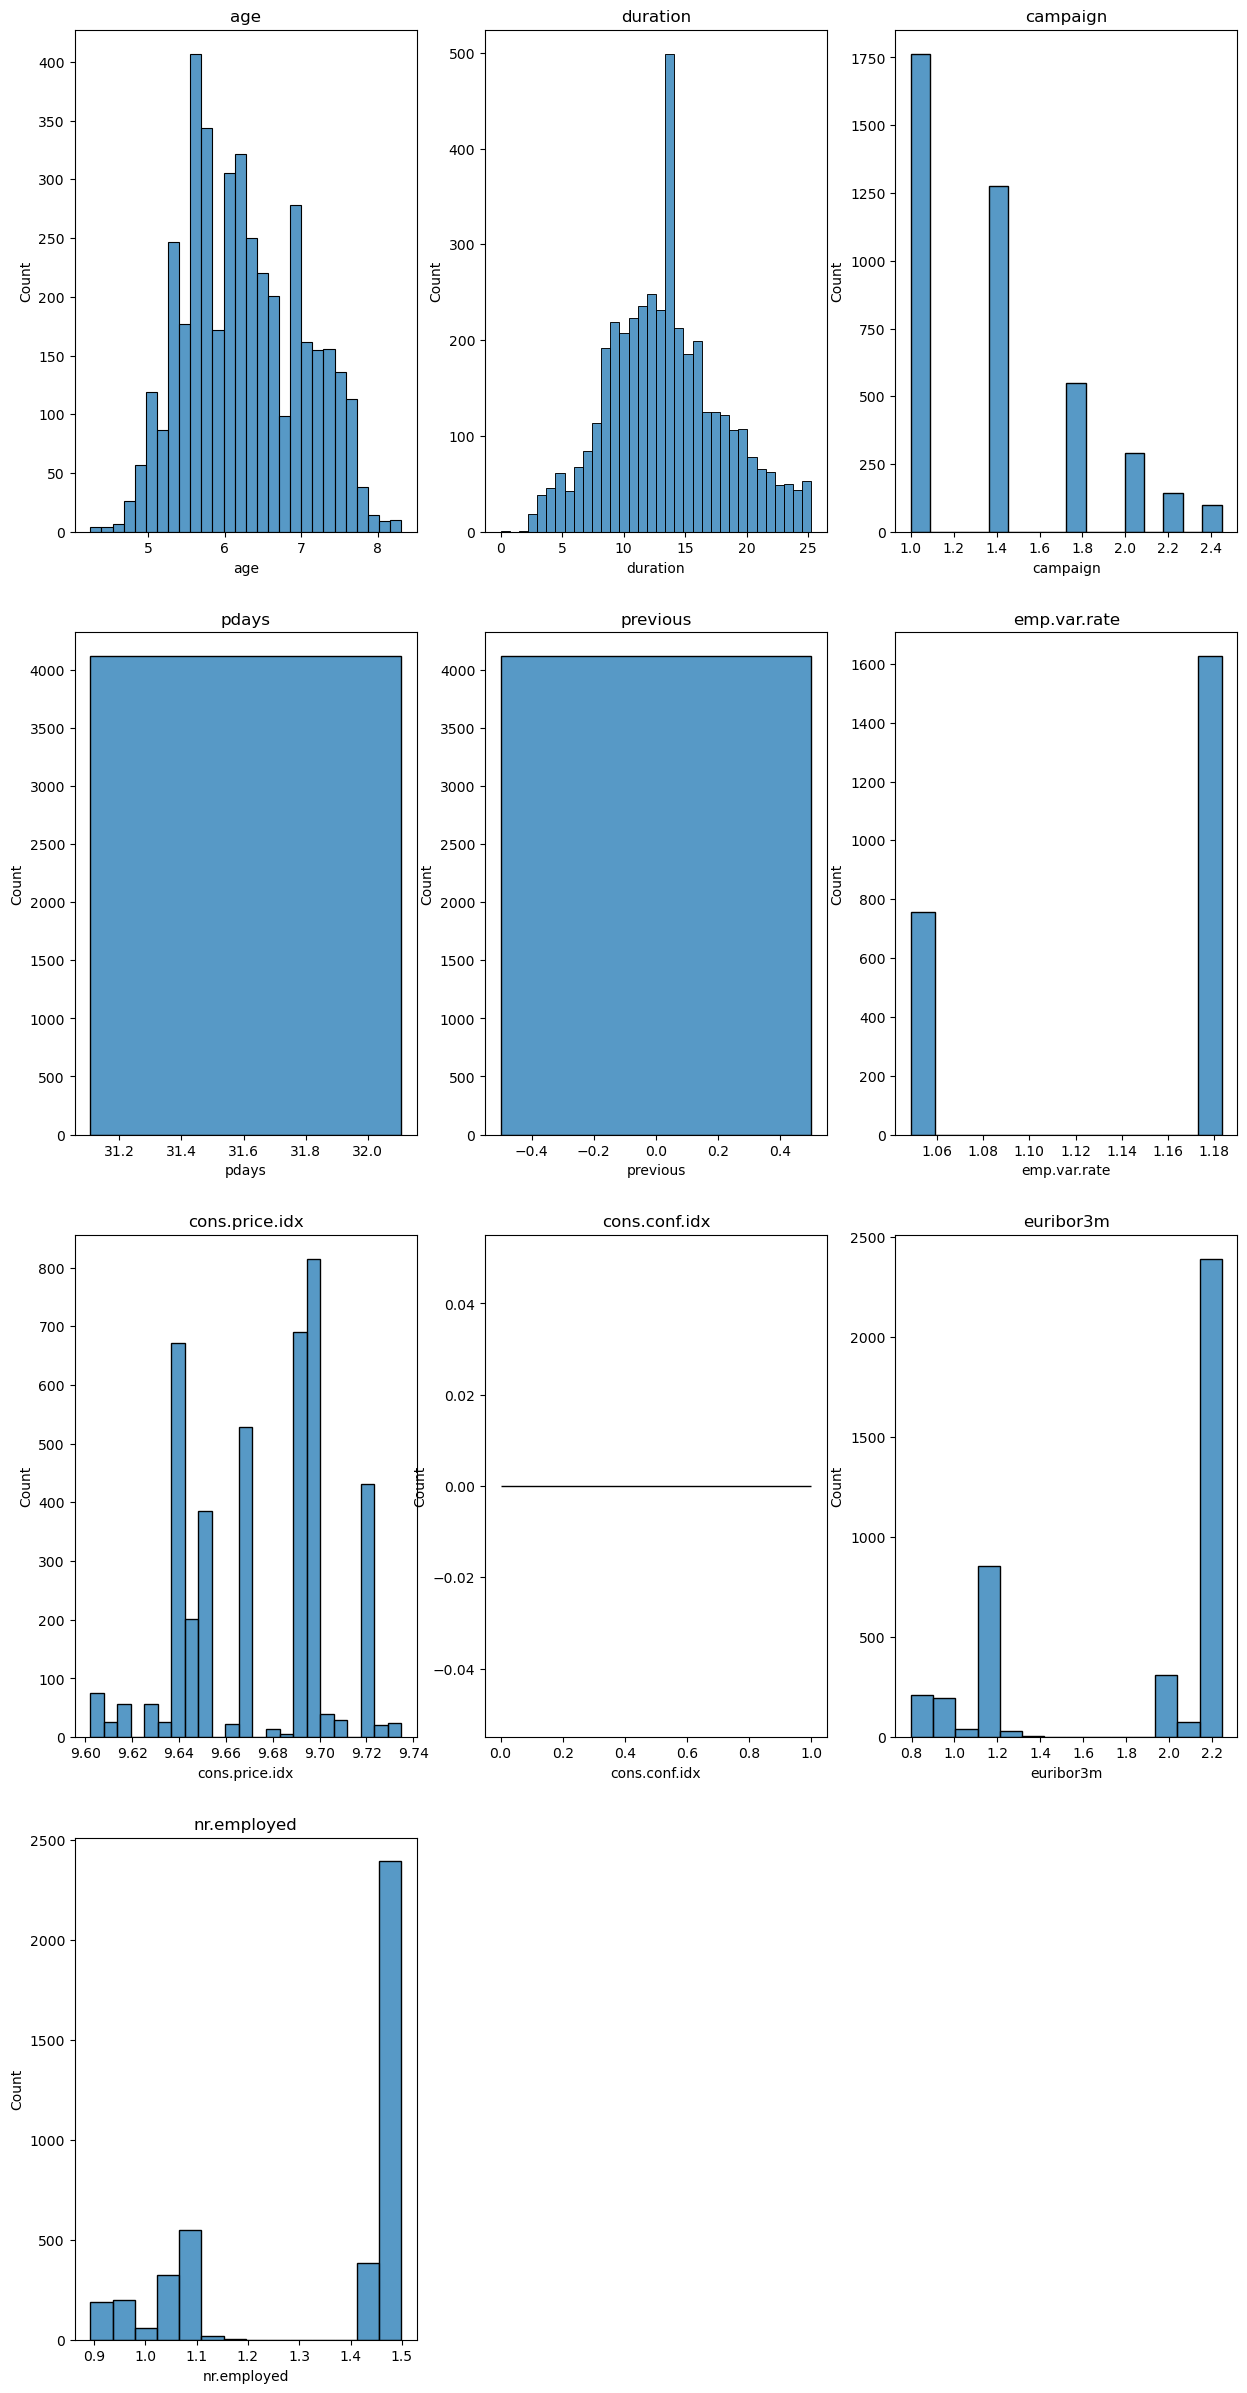

In [49]:
plt.figure(figsize = (15,30))

for index,name in enumerate(cat_cols,1):
    plt.subplot(4,3,index)
    sqrt_data = np.sqrt( df_copy[name])
    df_copy[names] = sqrt_data
    sns.histplot(sqrt_data)
    plt.title(name)

plt.show()

**Skewness after square root transformation**

In [50]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewness original: {original} after sqrt: {after}")

Skewness original: 0.72 after sqrt: 0.44
Skewness original: 3.29 after sqrt: 1.1
Skewness original: 4.0 after sqrt: 1.33
Skewness original: -4.78 after sqrt: 0.0
Skewness original: 4.02 after sqrt: 0.0
Skewness original: -0.73 after sqrt: -0.73
Skewness original: -0.22 after sqrt: -0.22
Skewness original: 0.29 after sqrt: 0.13
Skewness original: -0.72 after sqrt: -0.72
Skewness original: -1.08 after sqrt: -0.82


# Power Transformer

ValueError: num must be an integer with 1 <= num <= 4, not 5

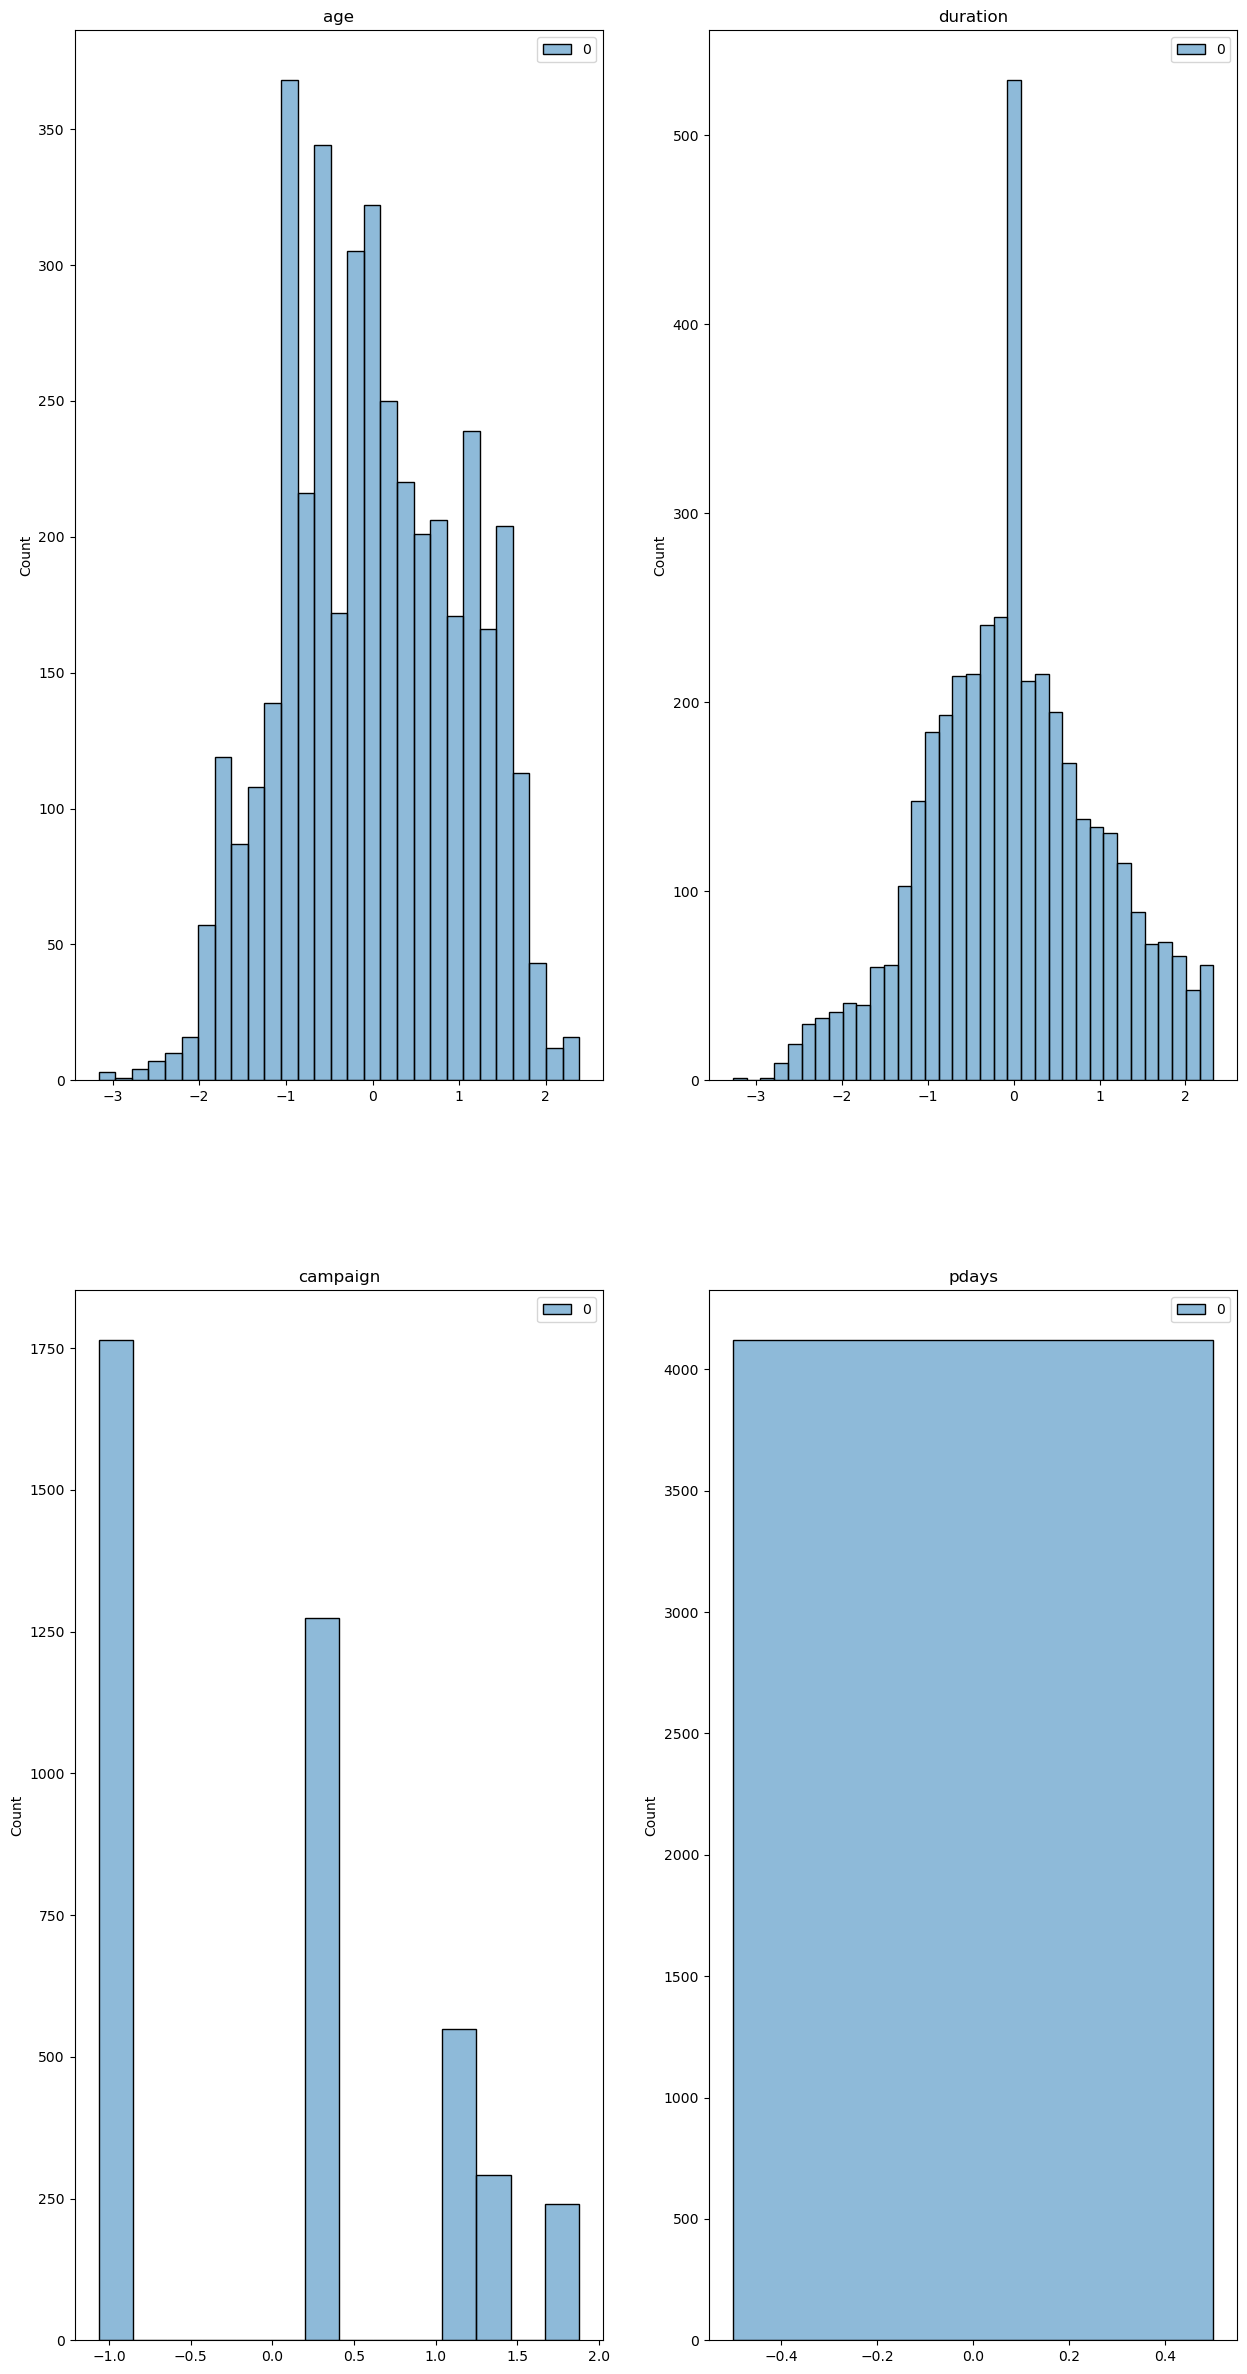

In [51]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize = (15,30))
for i, j in enumerate(cat_cols):
    i=i+1
    plt.subplot(2,2,i)
    pt = PowerTransformer(method ="yeo-johnson", standardize = True)
    yeo_transform = pt.fit_transform(df_copy[[j]])
    df[j] = yeo_transform
    sns.histplot(yeo_transform)
    plt.title(j)
    i=+i

plt.show()

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

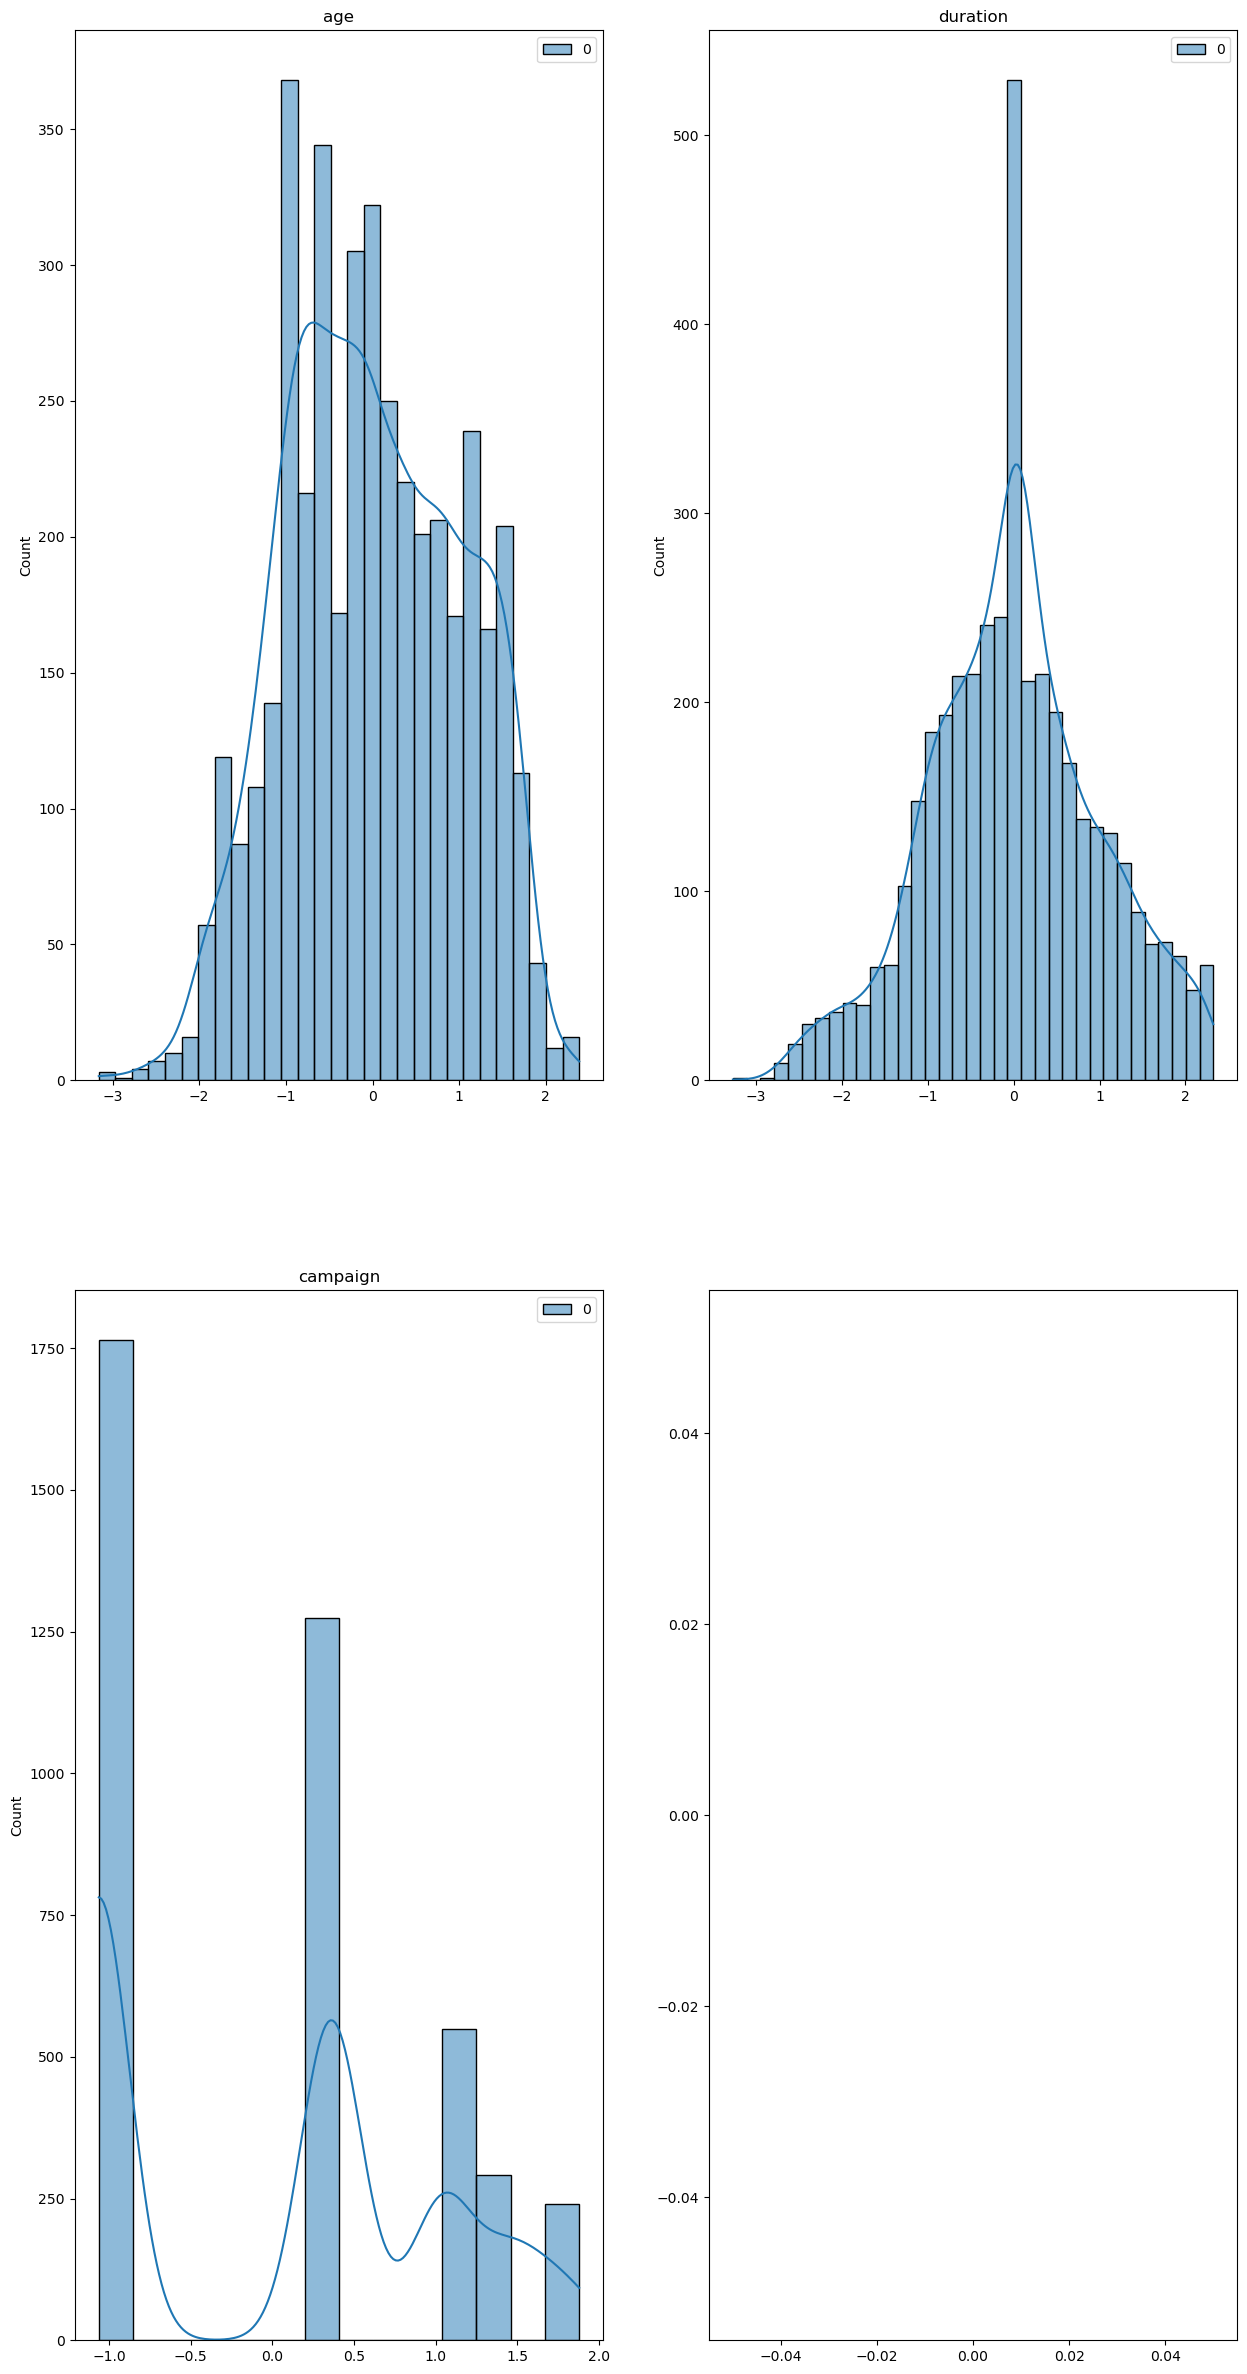

In [52]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 30))
for i, j in enumerate(cat_cols):
    i += 1
    plt.subplot(2, 2, i)
    pt = PowerTransformer(method="yeo-johnson", standardize=True)
    yeo_transform = pt.fit_transform(df_copy[[j]])
    df[j] = yeo_transform.flatten()  # Flatten to assign back to DataFrame
    sns.histplot(yeo_transform, kde=True)  # Plot histogram with KDE
    plt.title(j)
    i += 1  # Incrementing i for the next subplot

plt.tight_layout()  # Adjust layout
plt.show()


### **Skewness after power transform (yeo-jhonson)**

In [ ]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewness original {i}: {original} after PT: {after}")

# Skewness after median value

**Skewness original: 0.72 after sqrt: 0.44**

**Skewness original: 3.29 after sqrt: 1.1**

**Skewness original: 4.0 after sqrt: 1.33**

**Skewness original: -4.78 after sqrt: 0.0**

**Skewness original: 4.02 after sqrt: 0.0**

**Skewness original: -0.73 after sqrt: -0.73**

**Skewness original: -0.22 after sqrt: -0.22**

**Skewness original: 0.29 after sqrt: 0.13**

**Skewness original: -0.72 after sqrt: -0.72**

**Skewness original: -1.08 after sqrt: -0.82**

***There is no major changes in square root transformation and power transformation***

# Correlation

In [ ]:
df_copy.columns

In [ ]:
df_copy.corr(numeric_only = True)

In [ ]:
df_data = df_copy.corr(numeric_only = True)
plt.figure(figsize = (10,4))
sns.heatmap(df_data)

# Categorical to Numerical Transformation

In [ ]:
cat_cols = df_copy.select_dtypes("object").columns
cat_cols

In [ ]:
for i in cat_cols:
    print(i,df_copy[i].unique())

# Encoding